# Amazon Product Review Helpfulness Classification
## Natural Language Processing Final Project 
### Alex Bishka & Eve Kazarian

# Data Preprocessing

In [2]:
import json
import pandas as pd    

# json_file = "KindleStoreReviews.json"
json_file = "../HomeKitchenReviews.json"
df = pd.read_json(json_file,lines=True)
df.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,APYOBQE6M18AA,0615391206,Martin Schwartz,"[0, 0]",My daughter wanted this book and the price on ...,5,Best Price,1382140800,"10 19, 2013"
1,A1JVQTAGHYOL7F,0615391206,Michelle Dinh,"[0, 0]",I bought this zoku quick pop for my daughterr ...,5,zoku,1403049600,"06 18, 2014"
2,A3UPYGJKZ0XTU4,0615391206,mirasreviews,"[26, 27]",There is no shortage of pop recipes available ...,4,"Excels at Sweet Dessert Pops, but Falls Short ...",1367712000,"05 5, 2013"
3,A2MHCTX43MIMDZ,0615391206,"M. Johnson ""Tea Lover""","[14, 18]",This book is a must have if you get a Zoku (wh...,5,Creative Combos,1312416000,"08 4, 2011"
4,AHAI85T5C2DH3,0615391206,PugLover,"[0, 0]",This cookbook is great. I have really enjoyed...,4,A must own if you own the Zoku maker...,1402099200,"06 7, 2014"


In [3]:
df_copy = df.copy()

In [4]:
df['helpful_1'] = [l[0] for l in df['helpful']]
df['helpful_2'] = [l[1] for l in df['helpful']]
df['helpfulness'] = df['helpful_1']/df['helpful_2']

df = df[df['helpfulness'].notna()]

df['helpful_category'] = df['helpfulness'].map(lambda x: 1 if x>=0.5 else 0)
df

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,helpful_1,helpful_2,helpfulness,helpful_category
2,A3UPYGJKZ0XTU4,0615391206,mirasreviews,"[26, 27]",There is no shortage of pop recipes available ...,4,"Excels at Sweet Dessert Pops, but Falls Short ...",1367712000,"05 5, 2013",26,27,0.962963,1
3,A2MHCTX43MIMDZ,0615391206,"M. Johnson ""Tea Lover""","[14, 18]",This book is a must have if you get a Zoku (wh...,5,Creative Combos,1312416000,"08 4, 2011",14,18,0.777778,1
6,A1SW2D234X11MS,0615391206,"savinggrace ""savinggrace""","[2, 3]",This book is so beautifully illustrated and ea...,5,Beautifully illustrated recipe and instruction...,1341187200,"07 2, 2012",2,3,0.666667,1
7,A1ZH5ULI4SBO48,0615391206,"S. G. ""s.g.""","[32, 39]",I bought this when I bought the pop maker. I t...,2,Okay but you can figure it out yourself withou...,1323302400,"12 8, 2011",32,39,0.820513,1
8,A1V13XAWO98C1J,0615391206,"Stan ""Stan""","[13, 13]","The Zoku accessories are pricey, but the recip...",5,"If you have the Zoku maker, buy this!",1316649600,"09 22, 2011",13,13,1.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
551655,AWFGKB5SCJAO2,B00LB18EKK,allowingplace,"[1, 1]",Super handy little set for the kitchen! I have...,5,GREATER GRATER!!,1405382400,"07 15, 2014",1,1,1.000000,1
551656,A1Q1Z7IR79G52A,B00LB18EKK,"Ann Ingersoll Madison Rain ""Ann""","[1, 1]",Great grater for all kinds of cheese! Parmesan...,5,Love this grater and apple slicer! Works so we...,1405296000,"07 14, 2014",1,1,1.000000,1
551657,A2FU5LRHY17OY2,B00LB18EKK,CanHave,"[1, 1]",Absolutely love this grater. If cheese could b...,5,If cheese could be crisp,1405036800,"07 11, 2014",1,1,1.000000,1
551669,A1KQNP8MOJDJKC,B00LB18EKK,RS,"[1, 1]","Love both the products, The apple cutter is su...",5,Love both the products,1405209600,"07 13, 2014",1,1,1.000000,1


In [5]:
df = df.drop(df[df['helpful_category'] == 1].sample(frac=0.86).index)
df.helpful_category.value_counts()


# df = df.drop(df[df['helpful_category'] == 1].sample(frac=0.62).index)
# df.helpful_category.value_counts()

# df[(df['helpful_category'] != 1) | (np.random.rand(len(df)) < 0.86)]
# df.helpful_category.value_counts()


1    30682
0    29475
Name: helpful_category, dtype: int64

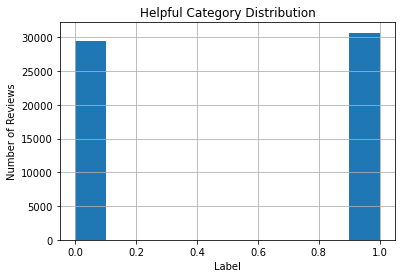

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

fig, ax = plt.subplots()


df_hist = pd.DataFrame()
df_hist["Helpful Category Distribution"] = df["helpful_category"]

df_hist.hist('Helpful Category Distribution', ax=ax)
plt.xlabel('Label')
plt.ylabel('Number of Reviews')
fig.savefig('helpful_category_distribution.png')



# Model

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import gc

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics import log_loss,confusion_matrix,classification_report,roc_curve,auc

import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from scipy import sparse
%matplotlib inline
seed = 42
import os
os.environ['OMP_NUM_THREADS'] = '4'

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

from sklearn.model_selection import train_test_split

In [8]:
vect_word = TfidfVectorizer(max_features=20000, lowercase=True, analyzer='word',
                        stop_words= 'english',ngram_range=(1,4),dtype=np.float32)
# vect_char = TfidfVectorizer(max_features=40000, lowercase=True, analyzer='char',
#                         stop_words= 'english',ngram_range=(3,6),dtype=np.float32)

In [9]:
X = np.array(df["reviewText"])
y = np.array(df["helpful_category"])
print(len(X))
print(len(y))
print(type(X))

60157
60157
<class 'numpy.ndarray'>


1
2


/opt/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


              precision    recall  f1-score   support

           0       0.62      0.61      0.61      9727
           1       0.63      0.64      0.63     10125

    accuracy                           0.62     19852
   macro avg       0.62      0.62      0.62     19852
weighted avg       0.62      0.62      0.62     19852



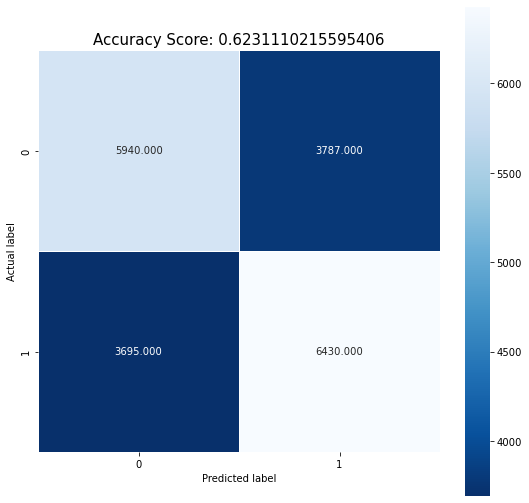

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, stratify = y)

X_test_copy = X_test.copy()
y_test_copy = y_test.copy()

print("1")
tr_vect = vect_word.fit_transform(X_train)
ts_vect = vect_word.transform(X_test)
print("2")

#     tr_vect_char = vect_char.fit_transform(X_train)
#     ts_vect_char = vect_char.transform(X_test)
#     print("2")

#     X = sparse.hstack([tr_vect, tr_vect_char])
#     x_test = sparse.hstack([ts_vect, ts_vect_char])
X_train = sparse.hstack([tr_vect])
X_test = sparse.hstack([ts_vect])

#     prd = np.zeros((x_test.shape[0],y_train.shape[1]))

lr = LogisticRegression(C=2,random_state = 42,class_weight = 'balanced')
lr.fit(X_train,y_train)
pred =  lr.predict(X_test)
score = lr.score(X_test, y_test)
cm = metrics.confusion_matrix(y_test, pred)
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);
#     print('\nConfusion matrix\n',confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))
plt.savefig("confusion_matrix.png")

# Classification Output

In [11]:
y_hats  = pd.DataFrame(pred).reset_index()
y_test_copy = pd.DataFrame(y_test_copy).reset_index()
X_test_copy = pd.DataFrame(X_test_copy).reset_index()

df_results = pd.DataFrame()
df_results["Prediction"] = y_hats[0]
df_results["Actual"] = y_test_copy[0]
df_results["Text"] = X_test_copy[0]
df_results.head()
df_results.to_csv("df_results.csv")

In [12]:
df_results_helpful = df_results.loc[(df_results['Actual'] == 1) & (df_results['Prediction'] == 1)]
df_results_helpful

,Prediction,Actual,Text
5,1,1,This clear plastic tablecloth is of a pretty h...
14,1,1,For serveral years we had this egg poacher. It...
15,1,1,I purchased this coffee grinder after reading ...
21,1,1,"I adore this juicer. It is powerful, quiet, an..."
22,1,1,"This is not a bad rug, but it's not particular..."
...,...,...,...
19822,1,1,Very heavy duty and durable product from brand...
19823,1,1,I picked this up at the start of summer. i've ...
19835,1,1,I looked at a lot of ice cream makers & review...
19838,1,1,"Outwardly, this is the same size as my last Os..."


In [13]:
df_results_unhelpful = df_results.loc[(df_results['Actual'] == 0) & (df_results['Prediction'] == 0)]
df_results_unhelpful

,Prediction,Actual,Text
2,0,0,Found this roaster online on a coupon site tha...
6,0,0,"I have hesitated to review this item, thinking..."
7,0,0,"When I purchased this product, the lady at the..."
8,0,0,"This knife block is pretty large, way bigger t..."
12,0,0,great for picking up pet hair the only downsid...
...,...,...,...
19837,0,0,I have been wanting one for years. Now all I ...
19841,0,0,I recently purchased two packs of this TV Tray...
19845,0,0,I have had this for a month or more. I like t...
19848,0,0,Work as advertised. By the time I've used 100 ...


In [14]:
df_results_predicted_helpful = df_results.loc[((df_results['Actual'] == 0) & (df_results['Prediction'] == 1))]
df_results_predicted_helpful


,Prediction,Actual,Text
3,1,0,There is nothing like a good neck pillow for l...
9,1,0,I ordered this to compliment an existing can i...
10,1,0,I really like this colander. It's easy to clea...
13,1,0,Bought this for outdoor movie night and it was...
17,1,0,"First off, the diameter is too small so I coul..."
...,...,...,...
19830,1,0,I thought it would be good to have so many siz...
19839,1,0,These are nice but really not wide enough for ...
19842,1,0,I have to agree with all the negative comments...
19846,1,0,I bought this for my husband's office over 4 m...


In [15]:
df_results_predicted_unhelpful = df_results.loc[((df_results['Actual'] == 1) & (df_results['Prediction'] == 0))]
df_results_predicted_unhelpful

,Prediction,Actual,Text
0,0,1,The curler does the job. You do get carrot cu...
1,0,1,I got a chance to use the Slim model yesterday...
4,0,1,I went from a pathetic 1 cup processor to this...
11,0,1,I used this on several good knives and was not...
19,0,1,Cute little set. Seem durable and takes the h...
...,...,...,...
19833,0,1,"Well, I took it out of the box and it doesn't ..."
19840,0,1,Not recommended. Hard to use and has already d...
19843,0,1,A giant bag of lolly pop sticks. It is great b...
19844,0,1,It is very important to read the instructions ...


# Sentiment Analysis

In [16]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk import sentiment
from nltk import word_tokenize
import nltk
nltk.download('vader_lexicon')
nltk.download('punkt')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/evekazarian/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/evekazarian/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [17]:
#initialize vader module
sid = SentimentIntensityAnalyzer()
# splits text into sentences/words
tokenizer = nltk.data.load('tokenizers/punkt/english.pickle')

In [18]:
# print sentiment distribution for entire snippet collection 
def sentimentDistributionCalc(tokenizedSnippets):
    posNum = 0
    negNum = 0
    neuNum = 0 
    for snippet in tokenizedSnippets:
        scores = sid.polarity_scores(snippet)
        for key in sorted(scores):
            if (scores['pos']>scores['neg'] and scores['pos']>scores['neu']):
                posNum += 1
                print("POSITIVE:", snippet)
            elif (scores['neu']>scores['neg'] and scores['neu']>scores['pos']):
                neuNum += 1
            elif (scores['neg']>scores['neu'] and scores['neg']>scores['pos']):
                negNum += 1      
                print("NEGATIVE:", snippet)

    
    total = posNum+negNum+neuNum

    print("Percentage positive:", (posNum/total)*100)
    print("Percentage negative:", (negNum/total)*100)
    print("Percentage neutral:", (neuNum/total)*100)
    if(negNum!=0 and posNum!=0):
        print("positive:negative ratio", posNum/negNum)

In [19]:
# print sentiment distribution for entire snippet collection 
def makePie(tokenizedSnippets):
    posNum = 0
    negNum = 0
    neuNum = 0 
    for snippet in tokenizedSnippets:
        scores = sid.polarity_scores(snippet)
        
        for key in sorted(scores):
            if (scores['pos']>scores['neg'] and scores['pos']>scores['neu']):
                posNum += 1
            elif (scores['neu']>scores['neg'] and scores['neu']>scores['pos']):
                neuNum += 1
            elif (scores['neg']>scores['neu'] and scores['neg']>scores['pos']):
                negNum += 1
    
    df = pd.DataFrame(
        {'sentiment': ['Positive', 'Negative', 'Neutral'],
       'count': [posNum, negNum, neuNum]},
        index=['Positive', 'Negative','Neutral']
        )
    
    plot = df.plot.pie(y='count', figsize=(6, 6))
    
    if(negNum!=0 and posNum!=0):
        df2 = pd.DataFrame(
            {'sentiment': ['Positive', 'Negative'],
           'count': [posNum, negNum]}, 
            index=['Positive', 'Negative']
            )

        plot = df2.plot.pie(y='count', figsize=(4, 4))

## Sentiment in CORRECTLY Classified HELPFUL reviews

positive:negative ratio 5.797250859106529

In [20]:
helpfulSnippets = []
for e in df_results_helpful[df_results_helpful.columns[2]]: 
    helpfulSnippets.append(e)
helpfulSnippetsTokenized = tokenizer.tokenize(''.join(helpfulSnippets))
sentimentDistributionCalc(helpfulSnippetsTokenized)


POSITIVE: Oh well.
POSITIVE: Oh well.
POSITIVE: Oh well.
POSITIVE: Oh well.
POSITIVE: The Spotbot works great, I have no residual rings from the cleaner itself, and I love, Love, LOVE, the convenience.
POSITIVE: The Spotbot works great, I have no residual rings from the cleaner itself, and I love, Love, LOVE, the convenience.
POSITIVE: The Spotbot works great, I have no residual rings from the cleaner itself, and I love, Love, LOVE, the convenience.
POSITIVE: The Spotbot works great, I have no residual rings from the cleaner itself, and I love, Love, LOVE, the convenience.
POSITIVE: A rich chocolate brown.
POSITIVE: A rich chocolate brown.
POSITIVE: A rich chocolate brown.
POSITIVE: A rich chocolate brown.
POSITIVE: Both are adequately comfortable.
POSITIVE: Both are adequately comfortable.
POSITIVE: Both are adequately comfortable.
POSITIVE: Both are adequately comfortable.
POSITIVE: I also love the colors, they are nice, bright colors.
POSITIVE: I also love the colors, they are nice,

POSITIVE: Overall, yes it is a good product.
POSITIVE: Overall, yes it is a good product.
POSITIVE: Overall, yes it is a good product.
POSITIVE: Overall, yes it is a good product.
POSITIVE: Our solution?
POSITIVE: Our solution?
POSITIVE: Our solution?
POSITIVE: Our solution?
POSITIVE: Perfect.I sure hope this cookware grows in popularity.
POSITIVE: Perfect.I sure hope this cookware grows in popularity.
POSITIVE: Perfect.I sure hope this cookware grows in popularity.
POSITIVE: Perfect.I sure hope this cookware grows in popularity.
POSITIVE: Excellent value, especially with free shipping.
POSITIVE: Excellent value, especially with free shipping.
POSITIVE: Excellent value, especially with free shipping.
POSITIVE: Excellent value, especially with free shipping.
POSITIVE: They wipe clean easily, and are pretty behind my white china.
POSITIVE: They wipe clean easily, and are pretty behind my white china.
POSITIVE: They wipe clean easily, and are pretty behind my white china.
POSITIVE: They w

NEGATIVE: Wrong.
NEGATIVE: Wrong.
NEGATIVE: Wrong.
NEGATIVE: Wrong.
POSITIVE: It's also very strong.
POSITIVE: It's also very strong.
POSITIVE: It's also very strong.
POSITIVE: It's also very strong.
POSITIVE: It was really good !
POSITIVE: It was really good !
POSITIVE: It was really good !
POSITIVE: It was really good !
POSITIVE: Luckily I was home.
POSITIVE: Luckily I was home.
POSITIVE: Luckily I was home.
POSITIVE: Luckily I was home.
POSITIVE: good luck draining.
POSITIVE: good luck draining.
POSITIVE: good luck draining.
POSITIVE: good luck draining.
NEGATIVE: 1) the lids don't fit perfectly snug.
NEGATIVE: 1) the lids don't fit perfectly snug.
NEGATIVE: 1) the lids don't fit perfectly snug.
NEGATIVE: 1) the lids don't fit perfectly snug.
POSITIVE: Great value!Silicone spatulas are good because they are easy to clean and very gentle to your cookware.
POSITIVE: Great value!Silicone spatulas are good because they are easy to clean and very gentle to your cookware.
POSITIVE: Great 

POSITIVE: Washes up well.
POSITIVE: Washes up well.
POSITIVE: Washes up well.
POSITIVE: Washes up well.
POSITIVE: This is a wonderful item for yourself, gift, shower gift, etc.
POSITIVE: This is a wonderful item for yourself, gift, shower gift, etc.
POSITIVE: This is a wonderful item for yourself, gift, shower gift, etc.
POSITIVE: This is a wonderful item for yourself, gift, shower gift, etc.
POSITIVE: How true!
POSITIVE: How true!
POSITIVE: How true!
POSITIVE: How true!
NEGATIVE: I'm very disappointed.
NEGATIVE: I'm very disappointed.
NEGATIVE: I'm very disappointed.
NEGATIVE: I'm very disappointed.
POSITIVE: With that comes a great love of little doll clothes!
POSITIVE: With that comes a great love of little doll clothes!
POSITIVE: With that comes a great love of little doll clothes!
POSITIVE: With that comes a great love of little doll clothes!
POSITIVE: I assure you!Received this off my Amazon wishlist, and it's a super juicer.
POSITIVE: I assure you!Received this off my Amazon wis

POSITIVE: The top sheet is very generous, with a nice drape.
POSITIVE: The top sheet is very generous, with a nice drape.
POSITIVE: The top sheet is very generous, with a nice drape.
POSITIVE: The top sheet is very generous, with a nice drape.
POSITIVE: We love it!!!
POSITIVE: We love it!!!
POSITIVE: We love it!!!
POSITIVE: We love it!!!
POSITIVE: !Ok this is the cutest heater ever!
POSITIVE: !Ok this is the cutest heater ever!
POSITIVE: !Ok this is the cutest heater ever!
POSITIVE: !Ok this is the cutest heater ever!
POSITIVE: It works great!!
POSITIVE: It works great!!
POSITIVE: It works great!!
POSITIVE: It works great!!
POSITIVE: like coffeemakers like to pretend is average).
POSITIVE: like coffeemakers like to pretend is average).
POSITIVE: like coffeemakers like to pretend is average).
POSITIVE: like coffeemakers like to pretend is average).
NEGATIVE: No complaints on this product.
NEGATIVE: No complaints on this product.
NEGATIVE: No complaints on this product.
NEGATIVE: No comp

NEGATIVE: They missed 2.
NEGATIVE: They missed 2.
NEGATIVE: They missed 2.
NEGATIVE: They missed 2.
POSITIVE: I am overjoyed with how powerful this machine is.
POSITIVE: I am overjoyed with how powerful this machine is.
POSITIVE: I am overjoyed with how powerful this machine is.
POSITIVE: I am overjoyed with how powerful this machine is.
POSITIVE: Well worth the price.I purchased 20 place settings to use for holiday entertaining.
POSITIVE: Well worth the price.I purchased 20 place settings to use for holiday entertaining.
POSITIVE: Well worth the price.I purchased 20 place settings to use for holiday entertaining.
POSITIVE: Well worth the price.I purchased 20 place settings to use for holiday entertaining.
POSITIVE: It works great, suction is awesome, and it stores wonderfully.
POSITIVE: It works great, suction is awesome, and it stores wonderfully.
POSITIVE: It works great, suction is awesome, and it stores wonderfully.
POSITIVE: It works great, suction is awesome, and it stores wonde

POSITIVE: Easy to clean, dishwasher safe but I usually wash by hand, which is also easy to do.
POSITIVE: Easy to clean, dishwasher safe but I usually wash by hand, which is also easy to do.
POSITIVE: Easy to clean, dishwasher safe but I usually wash by hand, which is also easy to do.
POSITIVE: Easy to clean, dishwasher safe but I usually wash by hand, which is also easy to do.
POSITIVE: WOOHOO!
POSITIVE: WOOHOO!
POSITIVE: WOOHOO!
POSITIVE: WOOHOO!
POSITIVE: It has been a great product and I love it.
POSITIVE: It has been a great product and I love it.
POSITIVE: It has been a great product and I love it.
POSITIVE: It has been a great product and I love it.
NEGATIVE: No muss, No fuss.
NEGATIVE: No muss, No fuss.
NEGATIVE: No muss, No fuss.
NEGATIVE: No muss, No fuss.
POSITIVE: Easy to use with quick clean up.
POSITIVE: Easy to use with quick clean up.
POSITIVE: Easy to use with quick clean up.
POSITIVE: Easy to use with quick clean up.
POSITIVE: It's well worth its price.
POSITIVE: It's 

POSITIVE: It worked beautifully!!
POSITIVE: It worked beautifully!!
POSITIVE: It worked beautifully!!
POSITIVE: It worked beautifully!!
POSITIVE: The slices are perfect!!
POSITIVE: The slices are perfect!!
POSITIVE: The slices are perfect!!
POSITIVE: The slices are perfect!!
POSITIVE: I love it and I am so glad I tried it.
POSITIVE: I love it and I am so glad I tried it.
POSITIVE: I love it and I am so glad I tried it.
POSITIVE: I love it and I am so glad I tried it.
POSITIVE: Powerful, seems well built, easy to clean, and good product output.
POSITIVE: Powerful, seems well built, easy to clean, and good product output.
POSITIVE: Powerful, seems well built, easy to clean, and good product output.
POSITIVE: Powerful, seems well built, easy to clean, and good product output.
POSITIVE: And....it toasts / bakes / broils perfectly.
POSITIVE: And....it toasts / bakes / broils perfectly.
POSITIVE: And....it toasts / bakes / broils perfectly.
POSITIVE: And....it toasts / bakes / broils perfect

POSITIVE: GREAT PRODUCT!
POSITIVE: GREAT PRODUCT!
POSITIVE: GREAT PRODUCT!
POSITIVE: GREAT PRODUCT!
POSITIVE: Perfect for warming sauces without burning them.
POSITIVE: Perfect for warming sauces without burning them.
POSITIVE: Perfect for warming sauces without burning them.
POSITIVE: Perfect for warming sauces without burning them.
POSITIVE: Took a chance and I am a happy customer.
POSITIVE: Took a chance and I am a happy customer.
POSITIVE: Took a chance and I am a happy customer.
POSITIVE: Took a chance and I am a happy customer.
POSITIVE: I love it!
POSITIVE: I love it!
POSITIVE: I love it!
POSITIVE: I love it!
NEGATIVE: No more ice and salt mess!
NEGATIVE: No more ice and salt mess!
NEGATIVE: No more ice and salt mess!
NEGATIVE: No more ice and salt mess!
POSITIVE: Clean up time is quick as well!
POSITIVE: Clean up time is quick as well!
POSITIVE: Clean up time is quick as well!
POSITIVE: Clean up time is quick as well!
POSITIVE: I highly recommend this machine!!
POSITIVE: I high

NEGATIVE: I stopped trying for fear I'd just ruin it.
NEGATIVE: I stopped trying for fear I'd just ruin it.
NEGATIVE: I stopped trying for fear I'd just ruin it.
NEGATIVE: I stopped trying for fear I'd just ruin it.
POSITIVE: That worked pretty well.
POSITIVE: That worked pretty well.
POSITIVE: That worked pretty well.
POSITIVE: That worked pretty well.
POSITIVE: (Still in great condition, though.
POSITIVE: (Still in great condition, though.
POSITIVE: (Still in great condition, though.
POSITIVE: (Still in great condition, though.
POSITIVE: I like that one better.
POSITIVE: I like that one better.
POSITIVE: I like that one better.
POSITIVE: I like that one better.
POSITIVE: I love it!!!
POSITIVE: I love it!!!
POSITIVE: I love it!!!
POSITIVE: I love it!!!
POSITIVE: Great product.
POSITIVE: Great product.
POSITIVE: Great product.
POSITIVE: Great product.
POSITIVE: Great value.The picture doesn't do this desk justice.
POSITIVE: Great value.The picture doesn't do this desk justice.
POSITIVE

POSITIVE: It's GREAT for HEALTHY SNACKS.
POSITIVE: It's GREAT for HEALTHY SNACKS.
POSITIVE: It's GREAT for HEALTHY SNACKS.
POSITIVE: It's GREAT for HEALTHY SNACKS.
POSITIVE: This was actually fun!
POSITIVE: This was actually fun!
POSITIVE: This was actually fun!
POSITIVE: This was actually fun!
POSITIVE: This was a good buy!
POSITIVE: This was a good buy!
POSITIVE: This was a good buy!
POSITIVE: This was a good buy!
POSITIVE: Good steel, holds an edge well.
POSITIVE: Good steel, holds an edge well.
POSITIVE: Good steel, holds an edge well.
POSITIVE: Good steel, holds an edge well.
POSITIVE: This one delivers awesome value for the bucks.
POSITIVE: This one delivers awesome value for the bucks.
POSITIVE: This one delivers awesome value for the bucks.
POSITIVE: This one delivers awesome value for the bucks.
POSITIVE: They are perfect!
POSITIVE: They are perfect!
POSITIVE: They are perfect!
POSITIVE: They are perfect!
POSITIVE: They are well worth the money!
POSITIVE: They are well worth t

POSITIVE: It makes perfectly round eggs -- scrambled, sunny side up, over easy.
POSITIVE: It makes perfectly round eggs -- scrambled, sunny side up, over easy.
POSITIVE: It makes perfectly round eggs -- scrambled, sunny side up, over easy.
POSITIVE: It makes perfectly round eggs -- scrambled, sunny side up, over easy.
POSITIVE: And the spatula fits perfectly -- particularly important for over easy eggs.
POSITIVE: And the spatula fits perfectly -- particularly important for over easy eggs.
POSITIVE: And the spatula fits perfectly -- particularly important for over easy eggs.
POSITIVE: And the spatula fits perfectly -- particularly important for over easy eggs.
POSITIVE: They are all great, far superior to other brands.These tongs store well and clean easily.
POSITIVE: They are all great, far superior to other brands.These tongs store well and clean easily.
POSITIVE: They are all great, far superior to other brands.These tongs store well and clean easily.
POSITIVE: They are all great, fa

POSITIVE: They are great!
POSITIVE: They are great!
POSITIVE: They are great!
POSITIVE: They are great!
POSITIVE: Feeling down?
POSITIVE: Feeling down?
POSITIVE: Feeling down?
POSITIVE: Feeling down?
POSITIVE: This fits wonderfully and looks great.
POSITIVE: This fits wonderfully and looks great.
POSITIVE: This fits wonderfully and looks great.
POSITIVE: This fits wonderfully and looks great.
NEGATIVE: I couldn't be happier!
NEGATIVE: I couldn't be happier!
NEGATIVE: I couldn't be happier!
NEGATIVE: I couldn't be happier!
POSITIVE: I am so impressed!
POSITIVE: I am so impressed!
POSITIVE: I am so impressed!
POSITIVE: I am so impressed!
POSITIVE: The motor is strong, really strong.
POSITIVE: The motor is strong, really strong.
POSITIVE: The motor is strong, really strong.
POSITIVE: The motor is strong, really strong.
POSITIVE: I have finally found the best!
POSITIVE: I have finally found the best!
POSITIVE: I have finally found the best!
POSITIVE: I have finally found the best!
POSITIVE

NEGATIVE: I blame inexperience.
NEGATIVE: I blame inexperience.
NEGATIVE: I blame inexperience.
NEGATIVE: I blame inexperience.
POSITIVE: Good buy.update.
POSITIVE: Good buy.update.
POSITIVE: Good buy.update.
POSITIVE: Good buy.update.
NEGATIVE: It was really gross.
NEGATIVE: It was really gross.
NEGATIVE: It was really gross.
NEGATIVE: It was really gross.
NEGATIVE: Slightly inconvenient but why waste electricity anyways?
NEGATIVE: Slightly inconvenient but why waste electricity anyways?
NEGATIVE: Slightly inconvenient but why waste electricity anyways?
NEGATIVE: Slightly inconvenient but why waste electricity anyways?
POSITIVE: Overall very nice though!***UPDATE!!
POSITIVE: Overall very nice though!***UPDATE!!
POSITIVE: Overall very nice though!***UPDATE!!
POSITIVE: Overall very nice though!***UPDATE!!
NEGATIVE: Pie fillings are the worst.
NEGATIVE: Pie fillings are the worst.
NEGATIVE: Pie fillings are the worst.
NEGATIVE: Pie fillings are the worst.
POSITIVE: It's beautiful, well m

POSITIVE: !I love this little pitcher!
POSITIVE: !I love this little pitcher!
POSITIVE: !I love this little pitcher!
POSITIVE: !I love this little pitcher!
POSITIVE: Perfect size!
POSITIVE: Perfect size!
POSITIVE: Perfect size!
POSITIVE: Perfect size!
POSITIVE: The quality is excellent.
POSITIVE: The quality is excellent.
POSITIVE: The quality is excellent.
POSITIVE: The quality is excellent.
POSITIVE: I love the bright color---always know they are prep stuff.
POSITIVE: I love the bright color---always know they are prep stuff.
POSITIVE: I love the bright color---always know they are prep stuff.
POSITIVE: I love the bright color---always know they are prep stuff.
POSITIVE: I love the stainless steel insides .
POSITIVE: I love the stainless steel insides .
POSITIVE: I love the stainless steel insides .
POSITIVE: I love the stainless steel insides .
POSITIVE: I am very pleased .
POSITIVE: I am very pleased .
POSITIVE: I am very pleased .
POSITIVE: I am very pleased .
POSITIVE: God Bless 

POSITIVE: I am happy I did.
POSITIVE: I am happy I did.
POSITIVE: I am happy I did.
POSITIVE: I am happy I did.
POSITIVE: It was easy to assemble and holds strong.
POSITIVE: It was easy to assemble and holds strong.
POSITIVE: It was easy to assemble and holds strong.
POSITIVE: It was easy to assemble and holds strong.
NEGATIVE: This is a good and a bad.
NEGATIVE: This is a good and a bad.
NEGATIVE: This is a good and a bad.
NEGATIVE: This is a good and a bad.
POSITIVE: Easy to install.
POSITIVE: Easy to install.
POSITIVE: Easy to install.
POSITIVE: Easy to install.
NEGATIVE: Other than that no problems.
NEGATIVE: Other than that no problems.
NEGATIVE: Other than that no problems.
NEGATIVE: Other than that no problems.
NEGATIVE: Shake that sucker hard!
NEGATIVE: Shake that sucker hard!
NEGATIVE: Shake that sucker hard!
NEGATIVE: Shake that sucker hard!
POSITIVE: Great tool for bakers.
POSITIVE: Great tool for bakers.
POSITIVE: Great tool for bakers.
POSITIVE: Great tool for bakers.
POSI

POSITIVE: Very good quality.Terrific dehydrator!
POSITIVE: Very good quality.Terrific dehydrator!
POSITIVE: Very good quality.Terrific dehydrator!
POSITIVE: Very good quality.Terrific dehydrator!
POSITIVE: Wash by hand instead.
POSITIVE: Wash by hand instead.
POSITIVE: Wash by hand instead.
POSITIVE: Wash by hand instead.
POSITIVE: Boy am I glad I did!
POSITIVE: Boy am I glad I did!
POSITIVE: Boy am I glad I did!
POSITIVE: Boy am I glad I did!
NEGATIVE: Low profile.
NEGATIVE: Low profile.
NEGATIVE: Low profile.
NEGATIVE: Low profile.
POSITIVE: I love my red scale.7.
POSITIVE: I love my red scale.7.
POSITIVE: I love my red scale.7.
POSITIVE: I love my red scale.7.
POSITIVE: The colors are just so stunning and bold &#8211;&#8211; love them.
POSITIVE: The colors are just so stunning and bold &#8211;&#8211; love them.
POSITIVE: The colors are just so stunning and bold &#8211;&#8211; love them.
POSITIVE: The colors are just so stunning and bold &#8211;&#8211; love them.
POSITIVE: Well for u

POSITIVE: It looks nicer as well.
POSITIVE: It looks nicer as well.
POSITIVE: It looks nicer as well.
POSITIVE: It looks nicer as well.
POSITIVE: Yeah, I know, I'm very adventurous.
POSITIVE: Yeah, I know, I'm very adventurous.
POSITIVE: Yeah, I know, I'm very adventurous.
POSITIVE: Yeah, I know, I'm very adventurous.
NEGATIVE: No.
NEGATIVE: No.
NEGATIVE: No.
NEGATIVE: No.
POSITIVE: Do I LOVE it?
POSITIVE: Do I LOVE it?
POSITIVE: Do I LOVE it?
POSITIVE: Do I LOVE it?
POSITIVE: Yes!
POSITIVE: Yes!
POSITIVE: Yes!
POSITIVE: Yes!
POSITIVE: The comfort is still perfect.
POSITIVE: The comfort is still perfect.
POSITIVE: The comfort is still perfect.
POSITIVE: The comfort is still perfect.
POSITIVE: Great service too - came quickly and in perfect condition.Product.
POSITIVE: Great service too - came quickly and in perfect condition.Product.
POSITIVE: Great service too - came quickly and in perfect condition.Product.
POSITIVE: Great service too - came quickly and in perfect condition.Product.


POSITIVE: He loves it.
POSITIVE: He loves it.
POSITIVE: He loves it.
POSITIVE: PERFECT for that task.
POSITIVE: PERFECT for that task.
POSITIVE: PERFECT for that task.
POSITIVE: PERFECT for that task.
POSITIVE: They are pretty easy to clean out as well.
POSITIVE: They are pretty easy to clean out as well.
POSITIVE: They are pretty easy to clean out as well.
POSITIVE: They are pretty easy to clean out as well.
NEGATIVE: Most of the nasty mess was emulsified.
NEGATIVE: Most of the nasty mess was emulsified.
NEGATIVE: Most of the nasty mess was emulsified.
NEGATIVE: Most of the nasty mess was emulsified.
POSITIVE: It works very well with a wok, steams the food perfectly and very easy to clean.
POSITIVE: It works very well with a wok, steams the food perfectly and very easy to clean.
POSITIVE: It works very well with a wok, steams the food perfectly and very easy to clean.
POSITIVE: It works very well with a wok, steams the food perfectly and very easy to clean.
POSITIVE: Definitely useful

POSITIVE: Excellent construction , works like a dream this pan is the real deal at a fantastic price.
POSITIVE: Excellent construction , works like a dream this pan is the real deal at a fantastic price.
POSITIVE: Excellent construction , works like a dream this pan is the real deal at a fantastic price.
POSITIVE: Excellent construction , works like a dream this pan is the real deal at a fantastic price.
POSITIVE: They truly are non-stick, and very easy to clean.
POSITIVE: They truly are non-stick, and very easy to clean.
POSITIVE: They truly are non-stick, and very easy to clean.
POSITIVE: They truly are non-stick, and very easy to clean.
POSITIVE: Lifetime guarantee.
POSITIVE: Lifetime guarantee.
POSITIVE: Lifetime guarantee.
POSITIVE: Lifetime guarantee.
POSITIVE: Works great.
POSITIVE: Works great.
POSITIVE: Works great.
POSITIVE: Works great.
POSITIVE: Looks great.
POSITIVE: Looks great.
POSITIVE: Looks great.
POSITIVE: Looks great.
POSITIVE: Jerky is a big win as well.
POSITIVE: 

POSITIVE: I love the color, also.
POSITIVE: I love the color, also.
POSITIVE: I love the color, also.
POSITIVE: I love the color, also.
POSITIVE: ).I really, really, really, love it and highly recommend.
POSITIVE: ).I really, really, really, love it and highly recommend.
POSITIVE: ).I really, really, really, love it and highly recommend.
POSITIVE: ).I really, really, really, love it and highly recommend.
POSITIVE: Works great.
POSITIVE: Works great.
POSITIVE: Works great.
POSITIVE: Works great.
POSITIVE: Makes the perfect margarita.
POSITIVE: Makes the perfect margarita.
POSITIVE: Makes the perfect margarita.
POSITIVE: Makes the perfect margarita.
POSITIVE: We love this thing and it was a great price.
POSITIVE: We love this thing and it was a great price.
POSITIVE: We love this thing and it was a great price.
POSITIVE: We love this thing and it was a great price.
NEGATIVE: Why no 5 star?
NEGATIVE: Why no 5 star?
NEGATIVE: Why no 5 star?
NEGATIVE: Why no 5 star?
POSITIVE: Easy.
POSITIVE

NEGATIVE: I am puzzled by the poor reviews.
NEGATIVE: I am puzzled by the poor reviews.
NEGATIVE: I am puzzled by the poor reviews.
NEGATIVE: I am puzzled by the poor reviews.
POSITIVE: The colanders are a nice bonus.
POSITIVE: The colanders are a nice bonus.
POSITIVE: The colanders are a nice bonus.
POSITIVE: The colanders are a nice bonus.
POSITIVE: The color is beautiful and matches my kitchen perfectly.
POSITIVE: The color is beautiful and matches my kitchen perfectly.
POSITIVE: The color is beautiful and matches my kitchen perfectly.
POSITIVE: The color is beautiful and matches my kitchen perfectly.
POSITIVE: The slot part works great.
POSITIVE: The slot part works great.
POSITIVE: The slot part works great.
POSITIVE: The slot part works great.
POSITIVE: It was a great value.
POSITIVE: It was a great value.
POSITIVE: It was a great value.
POSITIVE: It was a great value.
POSITIVE: Nice touch.
POSITIVE: Nice touch.
POSITIVE: Nice touch.
POSITIVE: Nice touch.
POSITIVE: Perfect every 

NEGATIVE: Not a great substitute.
NEGATIVE: Not a great substitute.
NEGATIVE: Not a great substitute.
NEGATIVE: Not a great substitute.
POSITIVE: Easy to use.
POSITIVE: Easy to use.
POSITIVE: Easy to use.
POSITIVE: Easy to use.
NEGATIVE: No.
NEGATIVE: No.
NEGATIVE: No.
NEGATIVE: No.
POSITIVE: It's definitely worth the price.
POSITIVE: It's definitely worth the price.
POSITIVE: It's definitely worth the price.
POSITIVE: It's definitely worth the price.
POSITIVE: This mattress is excellent.
POSITIVE: This mattress is excellent.
POSITIVE: This mattress is excellent.
POSITIVE: This mattress is excellent.
POSITIVE: Very comfortable and well made.
POSITIVE: Very comfortable and well made.
POSITIVE: Very comfortable and well made.
POSITIVE: Very comfortable and well made.
POSITIVE: I love my Shark Steam Mop and hoped this would be equally useful.
POSITIVE: I love my Shark Steam Mop and hoped this would be equally useful.
POSITIVE: I love my Shark Steam Mop and hoped this would be equally usef

POSITIVE: Long handle makes it easy and comfortable.
POSITIVE: Long handle makes it easy and comfortable.
POSITIVE: Long handle makes it easy and comfortable.
POSITIVE: Long handle makes it easy and comfortable.
NEGATIVE: How wrong you are!
NEGATIVE: How wrong you are!
NEGATIVE: How wrong you are!
NEGATIVE: How wrong you are!
POSITIVE: Fresh beans are even better.
POSITIVE: Fresh beans are even better.
POSITIVE: Fresh beans are even better.
POSITIVE: Fresh beans are even better.
POSITIVE: I'm glad I chose these!
POSITIVE: I'm glad I chose these!
POSITIVE: I'm glad I chose these!
POSITIVE: I'm glad I chose these!
POSITIVE: What a great deal!
POSITIVE: What a great deal!
POSITIVE: What a great deal!
POSITIVE: What a great deal!
POSITIVE: It works great.
POSITIVE: It works great.
POSITIVE: It works great.
POSITIVE: It works great.
NEGATIVE: Couch ruined.
NEGATIVE: Couch ruined.
NEGATIVE: Couch ruined.
NEGATIVE: Couch ruined.
POSITIVE: Well made and easy to clean.
POSITIVE: Well made and e

NEGATIVE: Wrong!!
NEGATIVE: Wrong!!
NEGATIVE: Wrong!!
NEGATIVE: Wrong!!
NEGATIVE: I hate using microwaves.
NEGATIVE: I hate using microwaves.
NEGATIVE: I hate using microwaves.
NEGATIVE: I hate using microwaves.
POSITIVE: One of the best ways to enjoy them.
POSITIVE: One of the best ways to enjoy them.
POSITIVE: One of the best ways to enjoy them.
POSITIVE: One of the best ways to enjoy them.
POSITIVE: Best way to bring tender goodness back to bread.
POSITIVE: Best way to bring tender goodness back to bread.
POSITIVE: Best way to bring tender goodness back to bread.
POSITIVE: Best way to bring tender goodness back to bread.
POSITIVE: LOL!
POSITIVE: LOL!
POSITIVE: LOL!
POSITIVE: LOL!
POSITIVE: Best to wait until it's cool.
POSITIVE: Best to wait until it's cool.
POSITIVE: Best to wait until it's cool.
POSITIVE: Best to wait until it's cool.
POSITIVE: So far, well worth it.
POSITIVE: So far, well worth it.
POSITIVE: So far, well worth it.
POSITIVE: So far, well worth it.
POSITIVE: The co

POSITIVE: But good to know!
POSITIVE: But good to know!
POSITIVE: But good to know!
POSITIVE: But good to know!
POSITIVE: *  Top heavy?
POSITIVE: *  Top heavy?
POSITIVE: *  Top heavy?
POSITIVE: *  Top heavy?
NEGATIVE: Absolutely positively no complaints!
NEGATIVE: Absolutely positively no complaints!
NEGATIVE: Absolutely positively no complaints!
NEGATIVE: Absolutely positively no complaints!
POSITIVE: **Not dishwasher safe.
POSITIVE: **Not dishwasher safe.
POSITIVE: **Not dishwasher safe.
POSITIVE: **Not dishwasher safe.
POSITIVE: Easy clean, easy to use, easy storage -- what more could you want?These spatula's save me in the kitchen.
POSITIVE: Easy clean, easy to use, easy storage -- what more could you want?These spatula's save me in the kitchen.
POSITIVE: Easy clean, easy to use, easy storage -- what more could you want?These spatula's save me in the kitchen.
POSITIVE: Easy clean, easy to use, easy storage -- what more could you want?These spatula's save me in the kitchen.
POSITIVE

POSITIVE: They've all been great.
POSITIVE: They've all been great.
POSITIVE: They've all been great.
POSITIVE: They've all been great.
POSITIVE: So easy and fun to do.
POSITIVE: So easy and fun to do.
POSITIVE: So easy and fun to do.
POSITIVE: So easy and fun to do.
POSITIVE: Nice.
POSITIVE: Nice.
POSITIVE: Nice.
POSITIVE: Nice.
POSITIVE: Powerful and efficient2.
POSITIVE: Powerful and efficient2.
POSITIVE: Powerful and efficient2.
POSITIVE: Powerful and efficient2.
POSITIVE: EASY to clean6.
POSITIVE: EASY to clean6.
POSITIVE: EASY to clean6.
POSITIVE: EASY to clean6.
POSITIVE: I am using about a 2 QT.
POSITIVE: I am using about a 2 QT.
POSITIVE: I am using about a 2 QT.
POSITIVE: I am using about a 2 QT.
POSITIVE: It is easy to use and easy to clean.
POSITIVE: It is easy to use and easy to clean.
POSITIVE: It is easy to use and easy to clean.
POSITIVE: It is easy to use and easy to clean.
POSITIVE: Coffee tasted great.
POSITIVE: Coffee tasted great.
POSITIVE: Coffee tasted great.
POS

NEGATIVE: No muss, no fuss.
NEGATIVE: No muss, no fuss.
NEGATIVE: No muss, no fuss.
NEGATIVE: No muss, no fuss.
POSITIVE: I feel blessed.
POSITIVE: I feel blessed.
POSITIVE: I feel blessed.
POSITIVE: I feel blessed.
NEGATIVE: Disappointing.
NEGATIVE: Disappointing.
NEGATIVE: Disappointing.
NEGATIVE: Disappointing.
POSITIVE: The power is great - almost unbelievable.Such performance at such a great price is wonderful.
POSITIVE: The power is great - almost unbelievable.Such performance at such a great price is wonderful.
POSITIVE: The power is great - almost unbelievable.Such performance at such a great price is wonderful.
POSITIVE: The power is great - almost unbelievable.Such performance at such a great price is wonderful.
POSITIVE: Tools are useful, and easy to use.
POSITIVE: Tools are useful, and easy to use.
POSITIVE: Tools are useful, and easy to use.
POSITIVE: Tools are useful, and easy to use.
POSITIVE: Ha!
POSITIVE: Ha!
POSITIVE: Ha!
POSITIVE: Ha!
POSITIVE: Look at WallyWorld.Ver

NEGATIVE: It's ridiculous!
NEGATIVE: It's ridiculous!
NEGATIVE: It's ridiculous!
NEGATIVE: It's ridiculous!
POSITIVE: Hope this helped.
POSITIVE: Hope this helped.
POSITIVE: Hope this helped.
POSITIVE: Hope this helped.
POSITIVE: Very easy.
POSITIVE: Very easy.
POSITIVE: Very easy.
POSITIVE: Very easy.
POSITIVE: The suctionis excellent.
POSITIVE: The suctionis excellent.
POSITIVE: The suctionis excellent.
POSITIVE: The suctionis excellent.
POSITIVE: But it's pretty powerful for its size as well.
POSITIVE: But it's pretty powerful for its size as well.
POSITIVE: But it's pretty powerful for its size as well.
POSITIVE: But it's pretty powerful for its size as well.
NEGATIVE: No "burping" needed.
NEGATIVE: No "burping" needed.
NEGATIVE: No "burping" needed.
NEGATIVE: No "burping" needed.
POSITIVE: I LOVE this pot!
POSITIVE: I LOVE this pot!
POSITIVE: I LOVE this pot!
POSITIVE: I LOVE this pot!
POSITIVE: I love all the Breville items.
POSITIVE: I love all the Breville items.
POSITIVE: I lo

POSITIVE: Worked fine, and safely too.
POSITIVE: Worked fine, and safely too.
POSITIVE: Worked fine, and safely too.
POSITIVE: Worked fine, and safely too.
POSITIVE: I find it easy to use and clean.
POSITIVE: I find it easy to use and clean.
POSITIVE: I find it easy to use and clean.
POSITIVE: I find it easy to use and clean.
POSITIVE: They fit a mattress with a memory foam topper perfectly.
POSITIVE: They fit a mattress with a memory foam topper perfectly.
POSITIVE: They fit a mattress with a memory foam topper perfectly.
POSITIVE: They fit a mattress with a memory foam topper perfectly.
POSITIVE: Cleans easily.
POSITIVE: Cleans easily.
POSITIVE: Cleans easily.
POSITIVE: Cleans easily.
NEGATIVE: No complaints there.
NEGATIVE: No complaints there.
NEGATIVE: No complaints there.
NEGATIVE: No complaints there.
POSITIVE: This is a great safe alternative to other mugs.
POSITIVE: This is a great safe alternative to other mugs.
POSITIVE: This is a great safe alternative to other mugs.
POSITI

NEGATIVE: Still cooks fine, but annoying and clearly defective.
NEGATIVE: Still cooks fine, but annoying and clearly defective.
NEGATIVE: Still cooks fine, but annoying and clearly defective.
NEGATIVE: Still cooks fine, but annoying and clearly defective.
POSITIVE: If you help this machine help you, I'm sure you'll be happy with it.
POSITIVE: If you help this machine help you, I'm sure you'll be happy with it.
POSITIVE: If you help this machine help you, I'm sure you'll be happy with it.
POSITIVE: If you help this machine help you, I'm sure you'll be happy with it.
POSITIVE: Love it!
POSITIVE: Love it!
POSITIVE: Love it!
POSITIVE: Love it!
POSITIVE: Love it!
POSITIVE: Love it!
POSITIVE: Love it!
POSITIVE: Love it!
POSITIVE: A perfect roll every time (just like the name).
POSITIVE: A perfect roll every time (just like the name).
POSITIVE: A perfect roll every time (just like the name).
POSITIVE: A perfect roll every time (just like the name).
NEGATIVE: And customer service SUCKS!!
NEGAT

NEGATIVE: that's annoying.
NEGATIVE: that's annoying.
NEGATIVE: that's annoying.
NEGATIVE: that's annoying.
POSITIVE: easier to just close the door.I love, love this mini pie and tart maker.
POSITIVE: easier to just close the door.I love, love this mini pie and tart maker.
POSITIVE: easier to just close the door.I love, love this mini pie and tart maker.
POSITIVE: easier to just close the door.I love, love this mini pie and tart maker.
POSITIVE: They were delicious.
POSITIVE: They were delicious.
POSITIVE: They were delicious.
POSITIVE: They were delicious.
POSITIVE: It's a really great machine.
POSITIVE: It's a really great machine.
POSITIVE: It's a really great machine.
POSITIVE: It's a really great machine.
POSITIVE: This pillow is awesome!
POSITIVE: This pillow is awesome!
POSITIVE: This pillow is awesome!
POSITIVE: This pillow is awesome!
POSITIVE: It is a wonderful machine, well made, versatile and easy to clean.
POSITIVE: It is a wonderful machine, well made, versatile and easy 

POSITIVE: It is actually easy to clean.
POSITIVE: It is actually easy to clean.
POSITIVE: It is actually easy to clean.
POSITIVE: It is actually easy to clean.
POSITIVE: Easy to open with push button, good capacity and a nice weight.
POSITIVE: Easy to open with push button, good capacity and a nice weight.
POSITIVE: Easy to open with push button, good capacity and a nice weight.
POSITIVE: Easy to open with push button, good capacity and a nice weight.
POSITIVE: Can't fault it.howdy y'all,this baking pan works well and is easy to clean.
POSITIVE: Can't fault it.howdy y'all,this baking pan works well and is easy to clean.
POSITIVE: Can't fault it.howdy y'all,this baking pan works well and is easy to clean.
POSITIVE: Can't fault it.howdy y'all,this baking pan works well and is easy to clean.
POSITIVE: Well worth the money.
POSITIVE: Well worth the money.
POSITIVE: Well worth the money.
POSITIVE: Well worth the money.
POSITIVE: Easy to clean too.
POSITIVE: Easy to clean too.
POSITIVE: Easy

POSITIVE: Be careful!
POSITIVE: Be careful!
POSITIVE: Be careful!
POSITIVE: Be careful!
POSITIVE: This is well worth the money.Love these glasses- very pretty.
POSITIVE: This is well worth the money.Love these glasses- very pretty.
POSITIVE: This is well worth the money.Love these glasses- very pretty.
POSITIVE: This is well worth the money.Love these glasses- very pretty.
POSITIVE: Good product.
POSITIVE: Good product.
POSITIVE: Good product.
POSITIVE: Good product.
POSITIVE: Good company.
POSITIVE: Good company.
POSITIVE: Good company.
POSITIVE: Good company.
POSITIVE: Problem solved, but no such luck.
POSITIVE: Problem solved, but no such luck.
POSITIVE: Problem solved, but no such luck.
POSITIVE: Problem solved, but no such luck.
POSITIVE: He loves it.
POSITIVE: He loves it.
POSITIVE: He loves it.
POSITIVE: He loves it.
POSITIVE: Love these containers, the different sizes are great.
POSITIVE: Love these containers, the different sizes are great.
POSITIVE: Love these containers, the

POSITIVE: He absolutely loves it.
POSITIVE: He absolutely loves it.
POSITIVE: He absolutely loves it.
POSITIVE: He absolutely loves it.
POSITIVE: Low is very quiet, energy efficient & won't disturb your sleep.
POSITIVE: Low is very quiet, energy efficient & won't disturb your sleep.
POSITIVE: Low is very quiet, energy efficient & won't disturb your sleep.
POSITIVE: Low is very quiet, energy efficient & won't disturb your sleep.
POSITIVE: It is a good strong processor.
POSITIVE: It is a good strong processor.
POSITIVE: It is a good strong processor.
POSITIVE: It is a good strong processor.
POSITIVE: It worked fantastic.
POSITIVE: It worked fantastic.
POSITIVE: It worked fantastic.
POSITIVE: It worked fantastic.
POSITIVE: Super easy to clean.
POSITIVE: Super easy to clean.
POSITIVE: Super easy to clean.
POSITIVE: Super easy to clean.
POSITIVE: Yes.
POSITIVE: Yes.
POSITIVE: Yes.
POSITIVE: Yes.
POSITIVE: I am sure it will be fantastic.
POSITIVE: I am sure it will be fantastic.
POSITIVE: I 

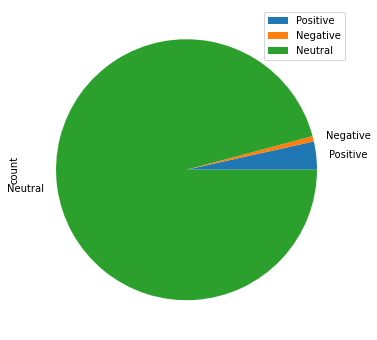

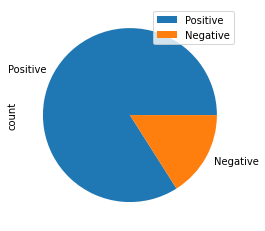

In [21]:
makePie(helpfulSnippetsTokenized)

## Sentiment in CORRECTLY Classified UNHELPFUL reviews

positive:negative ratio 2.6265060240963853

In [22]:
unhelpfulSnippets = []
for e in df_results_unhelpful[df_results_unhelpful.columns[2]]: 
    unhelpfulSnippets.append(e)
unhelpfulSnippetsTokenized = tokenizer.tokenize(''.join(unhelpfulSnippets))
sentimentDistributionCalc(unhelpfulSnippetsTokenized)

NEGATIVE: This is insane.
NEGATIVE: This is insane.
NEGATIVE: This is insane.
NEGATIVE: This is insane.
POSITIVE: Sorry Oreck.If you like ice coffee, this creates it great.
POSITIVE: Sorry Oreck.If you like ice coffee, this creates it great.
POSITIVE: Sorry Oreck.If you like ice coffee, this creates it great.
POSITIVE: Sorry Oreck.If you like ice coffee, this creates it great.
POSITIVE: Made well.
POSITIVE: Made well.
POSITIVE: Made well.
POSITIVE: Made well.
POSITIVE: Yes.
POSITIVE: Yes.
POSITIVE: Yes.
POSITIVE: Yes.
POSITIVE: Yes.
POSITIVE: Yes.
POSITIVE: Yes.
POSITIVE: Yes.
NEGATIVE: WRONG!
NEGATIVE: WRONG!
NEGATIVE: WRONG!
NEGATIVE: WRONG!
POSITIVE: It is cute.
POSITIVE: It is cute.
POSITIVE: It is cute.
POSITIVE: It is cute.
POSITIVE: Great choice the bed is super comfortable even for an adult now.
POSITIVE: Great choice the bed is super comfortable even for an adult now.
POSITIVE: Great choice the bed is super comfortable even for an adult now.
POSITIVE: Great choice the bed is s

NEGATIVE: No fuss no mess, just a great hot cup of tea.
NEGATIVE: No fuss no mess, just a great hot cup of tea.
NEGATIVE: No fuss no mess, just a great hot cup of tea.
NEGATIVE: No fuss no mess, just a great hot cup of tea.
POSITIVE: Dishwasher safe.
POSITIVE: Dishwasher safe.
POSITIVE: Dishwasher safe.
POSITIVE: Dishwasher safe.
NEGATIVE: Not good thinking.
NEGATIVE: Not good thinking.
NEGATIVE: Not good thinking.
NEGATIVE: Not good thinking.
POSITIVE: Easy cleaning.
POSITIVE: Easy cleaning.
POSITIVE: Easy cleaning.
POSITIVE: Easy cleaning.
POSITIVE: Great Slicer.
POSITIVE: Great Slicer.
POSITIVE: Great Slicer.
POSITIVE: Great Slicer.
NEGATIVE: Unfortunately, Brookstone sent me the wrong one.
NEGATIVE: Unfortunately, Brookstone sent me the wrong one.
NEGATIVE: Unfortunately, Brookstone sent me the wrong one.
NEGATIVE: Unfortunately, Brookstone sent me the wrong one.
POSITIVE: very good value for the money.Very well made product.
POSITIVE: very good value for the money.Very well made p

POSITIVE: She's a bit like a useful baby!
POSITIVE: She's a bit like a useful baby!
POSITIVE: She's a bit like a useful baby!
POSITIVE: She's a bit like a useful baby!
POSITIVE: I love it.
POSITIVE: I love it.
POSITIVE: I love it.
POSITIVE: I love it.
POSITIVE: This is amazing.
POSITIVE: This is amazing.
POSITIVE: This is amazing.
POSITIVE: This is amazing.
POSITIVE: I like that the water is pink, ha!
POSITIVE: I like that the water is pink, ha!
POSITIVE: I like that the water is pink, ha!
POSITIVE: I like that the water is pink, ha!
POSITIVE: Works great.
POSITIVE: Works great.
POSITIVE: Works great.
POSITIVE: Works great.
NEGATIVE: No oily residue.
NEGATIVE: No oily residue.
NEGATIVE: No oily residue.
NEGATIVE: No oily residue.
NEGATIVE: - no pun intended.
NEGATIVE: - no pun intended.
NEGATIVE: - no pun intended.
NEGATIVE: - no pun intended.
NEGATIVE: Grrr!
NEGATIVE: Grrr!
NEGATIVE: Grrr!
NEGATIVE: Grrr!
POSITIVE: Good luck with that.
POSITIVE: Good luck with that.
POSITIVE: Good luc

POSITIVE: It is beautiful.
POSITIVE: It is beautiful.
POSITIVE: It is beautiful.
POSITIVE: It is beautiful.
POSITIVE: I really like them.
POSITIVE: I really like them.
POSITIVE: I really like them.
POSITIVE: I really like them.
POSITIVE: Better still - It works perfectly!
POSITIVE: Better still - It works perfectly!
POSITIVE: Better still - It works perfectly!
POSITIVE: Better still - It works perfectly!
POSITIVE: So, 5-stars for a great scale and more importantly, superb customer service and dedication to giving customer satisfaction.
POSITIVE: So, 5-stars for a great scale and more importantly, superb customer service and dedication to giving customer satisfaction.
POSITIVE: So, 5-stars for a great scale and more importantly, superb customer service and dedication to giving customer satisfaction.
POSITIVE: So, 5-stars for a great scale and more importantly, superb customer service and dedication to giving customer satisfaction.
POSITIVE: Otherwise I really loved it.
POSITIVE: Otherwi

POSITIVE: I have always trusted Wilton.
POSITIVE: I have always trusted Wilton.
POSITIVE: I have always trusted Wilton.
POSITIVE: I have always trusted Wilton.
POSITIVE: A loyal Pyrex customer.UPDATE: The fan is dead.
POSITIVE: A loyal Pyrex customer.UPDATE: The fan is dead.
POSITIVE: A loyal Pyrex customer.UPDATE: The fan is dead.
POSITIVE: A loyal Pyrex customer.UPDATE: The fan is dead.
POSITIVE: I love the portability.
POSITIVE: I love the portability.
POSITIVE: I love the portability.
POSITIVE: I love the portability.
POSITIVE: Not bad.
POSITIVE: Not bad.
POSITIVE: Not bad.
POSITIVE: Not bad.
POSITIVE: This kit is much nicer than I anticipated, and made a great valentine gift!
POSITIVE: This kit is much nicer than I anticipated, and made a great valentine gift!
POSITIVE: This kit is much nicer than I anticipated, and made a great valentine gift!
POSITIVE: This kit is much nicer than I anticipated, and made a great valentine gift!
POSITIVE: Thank you for a great kit.
POSITIVE: Thank

NEGATIVE: Man, was I stupid!
NEGATIVE: Man, was I stupid!
NEGATIVE: Man, was I stupid!
NEGATIVE: Man, was I stupid!
NEGATIVE: It is a problem.
NEGATIVE: It is a problem.
NEGATIVE: It is a problem.
NEGATIVE: It is a problem.
POSITIVE: Lol quite entertaining for a rolly sleeper.
POSITIVE: Lol quite entertaining for a rolly sleeper.
POSITIVE: Lol quite entertaining for a rolly sleeper.
POSITIVE: Lol quite entertaining for a rolly sleeper.
POSITIVE: It's pretty useless.
POSITIVE: It's pretty useless.
POSITIVE: It's pretty useless.
POSITIVE: It's pretty useless.
POSITIVE: This is just great.
POSITIVE: This is just great.
POSITIVE: This is just great.
POSITIVE: This is just great.
POSITIVE: It's certainly my favorite kitchen tool.
POSITIVE: It's certainly my favorite kitchen tool.
POSITIVE: It's certainly my favorite kitchen tool.
POSITIVE: It's certainly my favorite kitchen tool.
POSITIVE: Love that FiestaWare!
POSITIVE: Love that FiestaWare!
POSITIVE: Love that FiestaWare!
POSITIVE: Love t

POSITIVE: Was easy to clean and take apart as well.
POSITIVE: Was easy to clean and take apart as well.
POSITIVE: Was easy to clean and take apart as well.
POSITIVE: Was easy to clean and take apart as well.
POSITIVE: But this model works great.
POSITIVE: But this model works great.
POSITIVE: But this model works great.
POSITIVE: But this model works great.
NEGATIVE: Absolutely ridiculous!
NEGATIVE: Absolutely ridiculous!
NEGATIVE: Absolutely ridiculous!
NEGATIVE: Absolutely ridiculous!
POSITIVE: Easy to make.
POSITIVE: Easy to make.
POSITIVE: Easy to make.
POSITIVE: Easy to make.
POSITIVE: Easy to pour.
POSITIVE: Easy to pour.
POSITIVE: Easy to pour.
POSITIVE: Easy to pour.
POSITIVE: I called Hoover who was great.
POSITIVE: I called Hoover who was great.
POSITIVE: I called Hoover who was great.
POSITIVE: I called Hoover who was great.
POSITIVE: Great, I thought.
POSITIVE: Great, I thought.
POSITIVE: Great, I thought.
POSITIVE: Great, I thought.
POSITIVE: Very useful.
POSITIVE: Very us

NEGATIVE: WRONG.
NEGATIVE: WRONG.
NEGATIVE: WRONG.
NEGATIVE: WRONG.
POSITIVE: Recommend the 2 setting.
POSITIVE: Recommend the 2 setting.
POSITIVE: Recommend the 2 setting.
POSITIVE: Recommend the 2 setting.
NEGATIVE: WRONG.
NEGATIVE: WRONG.
NEGATIVE: WRONG.
NEGATIVE: WRONG.
POSITIVE: Very easy to clean, and definitely non-stick.This works well.
POSITIVE: Very easy to clean, and definitely non-stick.This works well.
POSITIVE: Very easy to clean, and definitely non-stick.This works well.
POSITIVE: Very easy to clean, and definitely non-stick.This works well.
POSITIVE: Pretty poor quality Id say.
POSITIVE: Pretty poor quality Id say.
POSITIVE: Pretty poor quality Id say.
POSITIVE: Pretty poor quality Id say.
NEGATIVE: My bad but POOR quality&#8230;.I love my Dutch oven.
NEGATIVE: My bad but POOR quality&#8230;.I love my Dutch oven.
NEGATIVE: My bad but POOR quality&#8230;.I love my Dutch oven.
NEGATIVE: My bad but POOR quality&#8230;.I love my Dutch oven.
POSITIVE: Dishwasher Safe, Bake 

POSITIVE: I love these dishes!!
POSITIVE: I love these dishes!!
POSITIVE: I love these dishes!!
POSITIVE: I love these dishes!!
POSITIVE: Well worth the money!
POSITIVE: Well worth the money!
POSITIVE: Well worth the money!
POSITIVE: Well worth the money!
POSITIVE: It works well.
POSITIVE: It works well.
POSITIVE: It works well.
POSITIVE: It works well.
POSITIVE: "They Love it."
POSITIVE: "They Love it."
POSITIVE: "They Love it."
POSITIVE: "They Love it."
POSITIVE: :)  Thanks again.
POSITIVE: :)  Thanks again.
POSITIVE: :)  Thanks again.
POSITIVE: :)  Thanks again.
NEGATIVE: but not great.
NEGATIVE: but not great.
NEGATIVE: but not great.
NEGATIVE: but not great.
POSITIVE: OK, my mistake.
POSITIVE: OK, my mistake.
POSITIVE: OK, my mistake.
POSITIVE: OK, my mistake.
POSITIVE: LOVE THAT THEY'RE USA MADE, GOOD QUALITY AND VERY GOOD PRICE.
POSITIVE: LOVE THAT THEY'RE USA MADE, GOOD QUALITY AND VERY GOOD PRICE.
POSITIVE: LOVE THAT THEY'RE USA MADE, GOOD QUALITY AND VERY GOOD PRICE.
POSITIVE

POSITIVE: WORKED GREAT.
POSITIVE: WORKED GREAT.
POSITIVE: WORKED GREAT.
POSITIVE: WORKED GREAT.
POSITIVE: Cool, I guess.
POSITIVE: Cool, I guess.
POSITIVE: Cool, I guess.
POSITIVE: Cool, I guess.
POSITIVE: Great.
POSITIVE: Great.
POSITIVE: Great.
POSITIVE: Great.
POSITIVE: The color white is very nice, bright.
POSITIVE: The color white is very nice, bright.
POSITIVE: The color white is very nice, bright.
POSITIVE: The color white is very nice, bright.
NEGATIVE: No.
NEGATIVE: No.
NEGATIVE: No.
NEGATIVE: No.
NEGATIVE: No.
NEGATIVE: No.
NEGATIVE: No.
NEGATIVE: No.
POSITIVE: WOW how disappointed I was.
POSITIVE: WOW how disappointed I was.
POSITIVE: WOW how disappointed I was.
POSITIVE: WOW how disappointed I was.
POSITIVE: SAVE YOUR MONEY.I loved this set - very heavy, and absolutely LOVE the way it stacks.
POSITIVE: SAVE YOUR MONEY.I loved this set - very heavy, and absolutely LOVE the way it stacks.
POSITIVE: SAVE YOUR MONEY.I loved this set - very heavy, and absolutely LOVE the way it 

POSITIVE: Highly recommended!!
POSITIVE: Highly recommended!!
POSITIVE: Highly recommended!!
POSITIVE: Highly recommended!!
POSITIVE: Really good buy.
POSITIVE: Really good buy.
POSITIVE: Really good buy.
POSITIVE: Really good buy.
POSITIVE: The size is awesome.
POSITIVE: The size is awesome.
POSITIVE: The size is awesome.
POSITIVE: The size is awesome.
POSITIVE: The colors are great.
POSITIVE: The colors are great.
POSITIVE: The colors are great.
POSITIVE: The colors are great.
POSITIVE: I love the flip up straws...
POSITIVE: I love the flip up straws...
POSITIVE: I love the flip up straws...
POSITIVE: I love the flip up straws...
NEGATIVE: total mess.
NEGATIVE: total mess.
NEGATIVE: total mess.
NEGATIVE: total mess.
POSITIVE: The mug is simple, elegant, and beautiful.
POSITIVE: The mug is simple, elegant, and beautiful.
POSITIVE: The mug is simple, elegant, and beautiful.
POSITIVE: The mug is simple, elegant, and beautiful.
POSITIVE: I really like ozerie.
POSITIVE: I really like ozer

NEGATIVE: However, terrible customer service.
NEGATIVE: However, terrible customer service.
NEGATIVE: However, terrible customer service.
NEGATIVE: However, terrible customer service.
POSITIVE: Not disappointed.
POSITIVE: Not disappointed.
POSITIVE: Not disappointed.
POSITIVE: Not disappointed.
POSITIVE: Amazon is the best.
POSITIVE: Amazon is the best.
POSITIVE: Amazon is the best.
POSITIVE: Amazon is the best.
POSITIVE: They were GREAT!
POSITIVE: They were GREAT!
POSITIVE: They were GREAT!
POSITIVE: They were GREAT!
POSITIVE: My credit card was immediate credited.
POSITIVE: My credit card was immediate credited.
POSITIVE: My credit card was immediate credited.
POSITIVE: My credit card was immediate credited.
POSITIVE: I'm sure others have had better responses.
POSITIVE: I'm sure others have had better responses.
POSITIVE: I'm sure others have had better responses.
POSITIVE: I'm sure others have had better responses.
NEGATIVE: This seems lame.
NEGATIVE: This seems lame.
NEGATIVE: This

POSITIVE: Works good , love the tongs!
POSITIVE: Works good , love the tongs!
POSITIVE: Works good , love the tongs!
POSITIVE: Works good , love the tongs!
POSITIVE: Gorgeous!
POSITIVE: Gorgeous!
POSITIVE: Gorgeous!
POSITIVE: Gorgeous!
NEGATIVE: WRONG.
NEGATIVE: WRONG.
NEGATIVE: WRONG.
NEGATIVE: WRONG.
POSITIVE: They were ok.
POSITIVE: They were ok.
POSITIVE: They were ok.
POSITIVE: They were ok.
NEGATIVE: No.
NEGATIVE: No.
NEGATIVE: No.
NEGATIVE: No.
POSITIVE: Yeah.
POSITIVE: Yeah.
POSITIVE: Yeah.
POSITIVE: Yeah.
POSITIVE: I'm in crazy love with it.
POSITIVE: I'm in crazy love with it.
POSITIVE: I'm in crazy love with it.
POSITIVE: I'm in crazy love with it.
POSITIVE: It is perfect!
POSITIVE: It is perfect!
POSITIVE: It is perfect!
POSITIVE: It is perfect!
POSITIVE: The gloves fit snugly and securely.
POSITIVE: The gloves fit snugly and securely.
POSITIVE: The gloves fit snugly and securely.
POSITIVE: The gloves fit snugly and securely.
POSITIVE: it really is fantastic!
POSITIVE: it r

POSITIVE: The attachments seem well designed.
POSITIVE: The attachments seem well designed.
POSITIVE: The attachments seem well designed.
POSITIVE: The attachments seem well designed.
POSITIVE: Very nice material.
POSITIVE: Very nice material.
POSITIVE: Very nice material.
POSITIVE: Very nice material.
POSITIVE: Very happy with it.
POSITIVE: Very happy with it.
POSITIVE: Very happy with it.
POSITIVE: Very happy with it.
POSITIVE: We're pretty darn happy with it.
POSITIVE: We're pretty darn happy with it.
POSITIVE: We're pretty darn happy with it.
POSITIVE: We're pretty darn happy with it.
NEGATIVE: wow, way to kill a franchise!
NEGATIVE: wow, way to kill a franchise!
NEGATIVE: wow, way to kill a franchise!
NEGATIVE: wow, way to kill a franchise!
Percentage positive: 3.0221083594268907
Percentage negative: 1.1433722364550716
Percentage neutral: 95.83451940411804
positive:negative ratio 2.6431535269709543


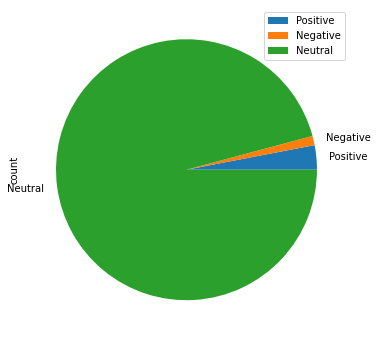

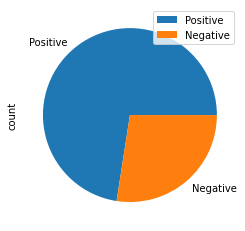

In [23]:
makePie(unhelpfulSnippetsTokenized)

## Sentiment in INCORRECTLY Classified HELPFUL reviews

positive:negative ratio 4.433333333333334

In [24]:
df_results_predicted_helpfulSnippets = []
for e in df_results_predicted_helpful[df_results_predicted_helpful.columns[2]]: 
    df_results_predicted_helpfulSnippets.append(e)
predictedhelpfulSnippetsTokenized = tokenizer.tokenize(''.join(df_results_predicted_helpfulSnippets))
sentimentDistributionCalc(predictedhelpfulSnippetsTokenized)

POSITIVE: This is a wonderful tool.
POSITIVE: This is a wonderful tool.
POSITIVE: This is a wonderful tool.
POSITIVE: This is a wonderful tool.
POSITIVE: Glad I did as these work beautifully.
POSITIVE: Glad I did as these work beautifully.
POSITIVE: Glad I did as these work beautifully.
POSITIVE: Glad I did as these work beautifully.
NEGATIVE: Oh' and so far no drainage problems.
NEGATIVE: Oh' and so far no drainage problems.
NEGATIVE: Oh' and so far no drainage problems.
NEGATIVE: Oh' and so far no drainage problems.
NEGATIVE: Otherwise, FORGET IT!
NEGATIVE: Otherwise, FORGET IT!
NEGATIVE: Otherwise, FORGET IT!
NEGATIVE: Otherwise, FORGET IT!
POSITIVE: I admire it every day.
POSITIVE: I admire it every day.
POSITIVE: I admire it every day.
POSITIVE: I admire it every day.
POSITIVE: Wow!
POSITIVE: Wow!
POSITIVE: Wow!
POSITIVE: Wow!
NEGATIVE: I hated it.
NEGATIVE: I hated it.
NEGATIVE: I hated it.
NEGATIVE: I hated it.
POSITIVE: I love it!This pillow is so awesome!
POSITIVE: I love it!T

POSITIVE: It's strong, and rigid.
POSITIVE: It's strong, and rigid.
POSITIVE: It's strong, and rigid.
POSITIVE: It's strong, and rigid.
POSITIVE: fits exxtremely well.
POSITIVE: fits exxtremely well.
POSITIVE: fits exxtremely well.
POSITIVE: fits exxtremely well.
POSITIVE: This insulated bottle was the perfect solution.
POSITIVE: This insulated bottle was the perfect solution.
POSITIVE: This insulated bottle was the perfect solution.
POSITIVE: This insulated bottle was the perfect solution.
POSITIVE: Amazing.
POSITIVE: Amazing.
POSITIVE: Amazing.
POSITIVE: Amazing.
NEGATIVE: No fuss.
NEGATIVE: No fuss.
NEGATIVE: No fuss.
NEGATIVE: No fuss.
NEGATIVE: Grrr!
NEGATIVE: Grrr!
NEGATIVE: Grrr!
NEGATIVE: Grrr!
POSITIVE: They are lovely hangers that fit well in the closet and that are fun and effective to use.
POSITIVE: They are lovely hangers that fit well in the closet and that are fun and effective to use.
POSITIVE: They are lovely hangers that fit well in the closet and that are fun and eff

POSITIVE: I like the look.
POSITIVE: I like the look.
POSITIVE: I like the look.
POSITIVE: I like the look.
POSITIVE: I like the feel.
POSITIVE: I like the feel.
POSITIVE: I like the feel.
POSITIVE: I like the feel.
POSITIVE: These are an excellent value.
POSITIVE: These are an excellent value.
POSITIVE: These are an excellent value.
POSITIVE: These are an excellent value.
POSITIVE: They want you to buy replacements.i love this popcorn maker its easy, fast and fun.
POSITIVE: They want you to buy replacements.i love this popcorn maker its easy, fast and fun.
POSITIVE: They want you to buy replacements.i love this popcorn maker its easy, fast and fun.
POSITIVE: They want you to buy replacements.i love this popcorn maker its easy, fast and fun.
POSITIVE: I am so glad I did because I love this mattress topper!
POSITIVE: I am so glad I did because I love this mattress topper!
POSITIVE: I am so glad I did because I love this mattress topper!
POSITIVE: I am so glad I did because I love this m

NEGATIVE: No.
NEGATIVE: No.
NEGATIVE: No.
NEGATIVE: No.
POSITIVE: Great design and functions well.
POSITIVE: Great design and functions well.
POSITIVE: Great design and functions well.
POSITIVE: Great design and functions well.
POSITIVE: They clean easily in the dishwasher.
POSITIVE: They clean easily in the dishwasher.
POSITIVE: They clean easily in the dishwasher.
POSITIVE: They clean easily in the dishwasher.
POSITIVE: I absolutely love the 10" mattress.
POSITIVE: I absolutely love the 10" mattress.
POSITIVE: I absolutely love the 10" mattress.
POSITIVE: I absolutely love the 10" mattress.
POSITIVE: Nice to have it.This vacuum is a great value for the money.PROS: Cleans well.
POSITIVE: Nice to have it.This vacuum is a great value for the money.PROS: Cleans well.
POSITIVE: Nice to have it.This vacuum is a great value for the money.PROS: Cleans well.
POSITIVE: Nice to have it.This vacuum is a great value for the money.PROS: Cleans well.
POSITIVE: Great value.
POSITIVE: Great value.
PO

NEGATIVE: She's very uncomfortable chopping and cutting things and has a pretty serious fear of cutting herself.
NEGATIVE: She's very uncomfortable chopping and cutting things and has a pretty serious fear of cutting herself.
NEGATIVE: She's very uncomfortable chopping and cutting things and has a pretty serious fear of cutting herself.
NEGATIVE: She's very uncomfortable chopping and cutting things and has a pretty serious fear of cutting herself.
POSITIVE: They fit my hand really well and are extremely sharp.
POSITIVE: They fit my hand really well and are extremely sharp.
POSITIVE: They fit my hand really well and are extremely sharp.
POSITIVE: They fit my hand really well and are extremely sharp.
NEGATIVE: I doubt it.
NEGATIVE: I doubt it.
NEGATIVE: I doubt it.
NEGATIVE: I doubt it.
POSITIVE: Looks great.
POSITIVE: Looks great.
POSITIVE: Looks great.
POSITIVE: Looks great.
POSITIVE: Strongly recommended product.I love using this scale.
POSITIVE: Strongly recommended product.I love us

POSITIVE: This is a better solution, but size-wise pretty marginal.This thing actually works!
POSITIVE: This is a better solution, but size-wise pretty marginal.This thing actually works!
POSITIVE: This is a better solution, but size-wise pretty marginal.This thing actually works!
POSITIVE: This is a better solution, but size-wise pretty marginal.This thing actually works!
POSITIVE: It's pretty cool.
POSITIVE: It's pretty cool.
POSITIVE: It's pretty cool.
POSITIVE: It's pretty cool.
POSITIVE: It lays nicely and I am very pleased.
POSITIVE: It lays nicely and I am very pleased.
POSITIVE: It lays nicely and I am very pleased.
POSITIVE: It lays nicely and I am very pleased.
POSITIVE: It's a good size and well made and looks good.
POSITIVE: It's a good size and well made and looks good.
POSITIVE: It's a good size and well made and looks good.
POSITIVE: It's a good size and well made and looks good.
POSITIVE: Love this product!
POSITIVE: Love this product!
POSITIVE: Love this product!
POSIT

POSITIVE: The fit is perfect!
POSITIVE: The fit is perfect!
POSITIVE: The fit is perfect!
POSITIVE: The fit is perfect!
NEGATIVE: It is terrible.
NEGATIVE: It is terrible.
NEGATIVE: It is terrible.
NEGATIVE: It is terrible.
POSITIVE: Just plug it in and you're ready to go.It's easy to clean as well.
POSITIVE: Just plug it in and you're ready to go.It's easy to clean as well.
POSITIVE: Just plug it in and you're ready to go.It's easy to clean as well.
POSITIVE: Just plug it in and you're ready to go.It's easy to clean as well.
POSITIVE: These are great.
POSITIVE: These are great.
POSITIVE: These are great.
POSITIVE: These are great.
POSITIVE: Nice glass and the tops are great.
POSITIVE: Nice glass and the tops are great.
POSITIVE: Nice glass and the tops are great.
POSITIVE: Nice glass and the tops are great.
POSITIVE: The comforter is also very comfortable.
POSITIVE: The comforter is also very comfortable.
POSITIVE: The comforter is also very comfortable.
POSITIVE: The comforter is als

POSITIVE: Thank you.I really love this tablecloth.
POSITIVE: Thank you.I really love this tablecloth.
POSITIVE: Thank you.I really love this tablecloth.
POSITIVE: Thank you.I really love this tablecloth.
NEGATIVE: it's disgusting!
NEGATIVE: it's disgusting!
NEGATIVE: it's disgusting!
NEGATIVE: it's disgusting!
POSITIVE: Fantastic piece of kit.
POSITIVE: Fantastic piece of kit.
POSITIVE: Fantastic piece of kit.
POSITIVE: Fantastic piece of kit.
POSITIVE: PLEASE!
POSITIVE: PLEASE!
POSITIVE: PLEASE!
POSITIVE: PLEASE!
POSITIVE: Ah - the dream !
POSITIVE: Ah - the dream !
POSITIVE: Ah - the dream !
POSITIVE: Ah - the dream !
POSITIVE: haha.
POSITIVE: haha.
POSITIVE: haha.
POSITIVE: haha.
NEGATIVE: Why bother adjusting?
NEGATIVE: Why bother adjusting?
NEGATIVE: Why bother adjusting?
NEGATIVE: Why bother adjusting?
POSITIVE: Yes they feel soft and look great.
POSITIVE: Yes they feel soft and look great.
POSITIVE: Yes they feel soft and look great.
POSITIVE: Yes they feel soft and look great.


POSITIVE: Good luck!
POSITIVE: Good luck!
POSITIVE: Good luck!
POSITIVE: Good luck!
POSITIVE: It's like pouring from a regular drinking glass.The solid part is great.
POSITIVE: It's like pouring from a regular drinking glass.The solid part is great.
POSITIVE: It's like pouring from a regular drinking glass.The solid part is great.
POSITIVE: It's like pouring from a regular drinking glass.The solid part is great.
POSITIVE: I love it!
POSITIVE: I love it!
POSITIVE: I love it!
POSITIVE: I love it!
POSITIVE: I totally recommend it!!
POSITIVE: I totally recommend it!!
POSITIVE: I totally recommend it!!
POSITIVE: I totally recommend it!!
NEGATIVE: It is dull.
NEGATIVE: It is dull.
NEGATIVE: It is dull.
NEGATIVE: It is dull.
NEGATIVE: Quite dull.
NEGATIVE: Quite dull.
NEGATIVE: Quite dull.
NEGATIVE: Quite dull.
POSITIVE: This is definitely a great device for the money.
POSITIVE: This is definitely a great device for the money.
POSITIVE: This is definitely a great device for the money.
POSITIV

POSITIVE: Not worth the trouble.
POSITIVE: Not worth the trouble.
POSITIVE: Not worth the trouble.
POSITIVE: Not worth the trouble.
POSITIVE: Very very nice product.
POSITIVE: Very very nice product.
POSITIVE: Very very nice product.
POSITIVE: Very very nice product.
POSITIVE: I love this particular press.
POSITIVE: I love this particular press.
POSITIVE: I love this particular press.
POSITIVE: I love this particular press.
POSITIVE: I love it.
POSITIVE: I love it.
POSITIVE: I love it.
POSITIVE: I love it.
POSITIVE: Good inspirations.
POSITIVE: Good inspirations.
POSITIVE: Good inspirations.
POSITIVE: Good inspirations.
POSITIVE: Plus it is fun.
POSITIVE: Plus it is fun.
POSITIVE: Plus it is fun.
POSITIVE: Plus it is fun.
POSITIVE: They always clean up nicely.
POSITIVE: They always clean up nicely.
POSITIVE: They always clean up nicely.
POSITIVE: They always clean up nicely.
POSITIVE: This feels so good.
POSITIVE: This feels so good.
POSITIVE: This feels so good.
POSITIVE: This feels s

POSITIVE: Very good quality.
POSITIVE: Very good quality.
POSITIVE: Very good quality.
POSITIVE: Very good quality.
POSITIVE: Easy to use and to clean.
POSITIVE: Easy to use and to clean.
POSITIVE: Easy to use and to clean.
POSITIVE: Easy to use and to clean.
POSITIVE: It is a great value for the price.
POSITIVE: It is a great value for the price.
POSITIVE: It is a great value for the price.
POSITIVE: It is a great value for the price.
POSITIVE: Great price, too.It's heavy.
POSITIVE: Great price, too.It's heavy.
POSITIVE: Great price, too.It's heavy.
POSITIVE: Great price, too.It's heavy.
POSITIVE: Easy to clean, easy to use.
POSITIVE: Easy to clean, easy to use.
POSITIVE: Easy to clean, easy to use.
POSITIVE: Easy to clean, easy to use.
POSITIVE: It's awesome.
POSITIVE: It's awesome.
POSITIVE: It's awesome.
POSITIVE: It's awesome.
POSITIVE: It's a fun, cool little colander and a huge space saver.
POSITIVE: It's a fun, cool little colander and a huge space saver.
POSITIVE: It's a fun, 

POSITIVE: Easy to use.O.
POSITIVE: Easy to use.O.
POSITIVE: Easy to use.O.
POSITIVE: Easy to use.O.
POSITIVE: Easy to use and fun.
POSITIVE: Easy to use and fun.
POSITIVE: Easy to use and fun.
POSITIVE: Easy to use and fun.
NEGATIVE: It's ridiculous.
NEGATIVE: It's ridiculous.
NEGATIVE: It's ridiculous.
NEGATIVE: It's ridiculous.
POSITIVE: It's easy to use and easy to clean.
POSITIVE: It's easy to use and easy to clean.
POSITIVE: It's easy to use and easy to clean.
POSITIVE: It's easy to use and easy to clean.
POSITIVE: It's certainly faster than chopping by hand.
POSITIVE: It's certainly faster than chopping by hand.
POSITIVE: It's certainly faster than chopping by hand.
POSITIVE: It's certainly faster than chopping by hand.
POSITIVE: Please don't waste your money.I LOVE this organizer!
POSITIVE: Please don't waste your money.I LOVE this organizer!
POSITIVE: Please don't waste your money.I LOVE this organizer!
POSITIVE: Please don't waste your money.I LOVE this organizer!
POSITIVE: Th

POSITIVE: The cups are very pretty, well made and perfectly sized.
POSITIVE: The cups are very pretty, well made and perfectly sized.
POSITIVE: The cups are very pretty, well made and perfectly sized.
POSITIVE: The cups are very pretty, well made and perfectly sized.
POSITIVE: The bubbles are the best, and more comfortable.
POSITIVE: The bubbles are the best, and more comfortable.
POSITIVE: The bubbles are the best, and more comfortable.
POSITIVE: The bubbles are the best, and more comfortable.
POSITIVE: I love that function.
POSITIVE: I love that function.
POSITIVE: I love that function.
POSITIVE: I love that function.
NEGATIVE: Weird, eh?
NEGATIVE: Weird, eh?
NEGATIVE: Weird, eh?
NEGATIVE: Weird, eh?
NEGATIVE: Stainless steal like but not stainless steal.
NEGATIVE: Stainless steal like but not stainless steal.
NEGATIVE: Stainless steal like but not stainless steal.
NEGATIVE: Stainless steal like but not stainless steal.
POSITIVE: but so glad i followed through.
POSITIVE: but so glad 

POSITIVE: Oh yeah!
POSITIVE: Oh yeah!
POSITIVE: Oh yeah!
POSITIVE: Oh yeah!
POSITIVE: I love it.
POSITIVE: I love it.
POSITIVE: I love it.
POSITIVE: I love it.
NEGATIVE: Broken glass in the kitchen is no fun.
NEGATIVE: Broken glass in the kitchen is no fun.
NEGATIVE: Broken glass in the kitchen is no fun.
NEGATIVE: Broken glass in the kitchen is no fun.
NEGATIVE: No more grinding your fingers by accident.
NEGATIVE: No more grinding your fingers by accident.
NEGATIVE: No more grinding your fingers by accident.
NEGATIVE: No more grinding your fingers by accident.
POSITIVE: So easy to use/clean.
POSITIVE: So easy to use/clean.
POSITIVE: So easy to use/clean.
POSITIVE: So easy to use/clean.
POSITIVE: Sizes are great.
POSITIVE: Sizes are great.
POSITIVE: Sizes are great.
POSITIVE: Sizes are great.
POSITIVE: They look great, heat evenly and quickly, and are super easy to clean.
POSITIVE: They look great, heat evenly and quickly, and are super easy to clean.
POSITIVE: They look great, heat ev

POSITIVE: If you want a great blender - get a Vitamix.
POSITIVE: If you want a great blender - get a Vitamix.
POSITIVE: If you want a great blender - get a Vitamix.
POSITIVE: If you want a great blender - get a Vitamix.
POSITIVE: You'll be glad you did.This is a great little appliance.
POSITIVE: You'll be glad you did.This is a great little appliance.
POSITIVE: You'll be glad you did.This is a great little appliance.
POSITIVE: You'll be glad you did.This is a great little appliance.
POSITIVE: Fit perfectly.
POSITIVE: Fit perfectly.
POSITIVE: Fit perfectly.
POSITIVE: Fit perfectly.
POSITIVE: Looks great.
POSITIVE: Looks great.
POSITIVE: Looks great.
POSITIVE: Looks great.
POSITIVE: This is super loud.
POSITIVE: This is super loud.
POSITIVE: This is super loud.
POSITIVE: This is super loud.
POSITIVE: The rest of the components just fit together to make a very effective juicer that's super easy to clean and reassemble.
POSITIVE: The rest of the components just fit together to make a very 

POSITIVE: They fit perfectly.
POSITIVE: They fit perfectly.
POSITIVE: They fit perfectly.
POSITIVE: They fit perfectly.
POSITIVE: So it does save significant time an cooks to food better.
POSITIVE: So it does save significant time an cooks to food better.
POSITIVE: So it does save significant time an cooks to food better.
POSITIVE: So it does save significant time an cooks to food better.
POSITIVE: I strongly recommend this tool!
POSITIVE: I strongly recommend this tool!
POSITIVE: I strongly recommend this tool!
POSITIVE: I strongly recommend this tool!
POSITIVE: The square shape is great.
POSITIVE: The square shape is great.
POSITIVE: The square shape is great.
POSITIVE: The square shape is great.
NEGATIVE: I bought this curtain for my son who suffers from a traumatic brain injury.
NEGATIVE: I bought this curtain for my son who suffers from a traumatic brain injury.
NEGATIVE: I bought this curtain for my son who suffers from a traumatic brain injury.
NEGATIVE: I bought this curtain fo

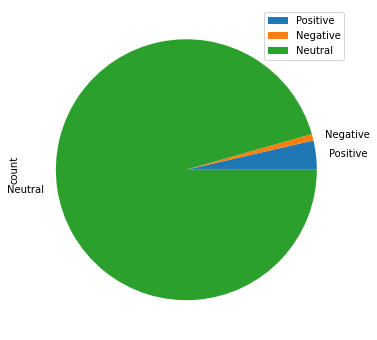

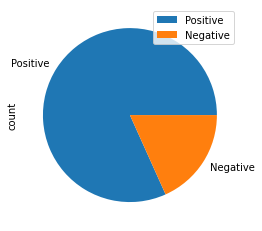

In [25]:
makePie(predictedhelpfulSnippetsTokenized)

## Sentiment in INCORRECTLY Classified UNHELPFUL reviews

positive:negative ratio 3.6815286624203822

In [26]:
df_results_predicted_unhelpfulSnippets = []
for e in df_results_predicted_unhelpful[df_results_predicted_unhelpful.columns[2]]: 
    df_results_predicted_unhelpfulSnippets.append(e)
predictedunhelpfulSnippetsTokenized = tokenizer.tokenize(''.join(df_results_predicted_unhelpfulSnippets))
sentimentDistributionCalc(predictedunhelpfulSnippetsTokenized)

POSITIVE: The steam feels nice and warm to the hand.
POSITIVE: The steam feels nice and warm to the hand.
POSITIVE: The steam feels nice and warm to the hand.
POSITIVE: The steam feels nice and warm to the hand.
NEGATIVE: My bad on the head falling off.
NEGATIVE: My bad on the head falling off.
NEGATIVE: My bad on the head falling off.
NEGATIVE: My bad on the head falling off.
NEGATIVE: Disappointed.
NEGATIVE: Disappointed.
NEGATIVE: Disappointed.
NEGATIVE: Disappointed.
POSITIVE: I like it.
POSITIVE: I like it.
POSITIVE: I like it.
POSITIVE: I like it.
POSITIVE: But, like, don't get upset if you don't like it.
POSITIVE: But, like, don't get upset if you don't like it.
POSITIVE: But, like, don't get upset if you don't like it.
POSITIVE: But, like, don't get upset if you don't like it.
POSITIVE: It's easier to use a spatula and more effective.
POSITIVE: It's easier to use a spatula and more effective.
POSITIVE: It's easier to use a spatula and more effective.
POSITIVE: It's easier to us

POSITIVE: Save the money!This was packaged very well!
POSITIVE: Save the money!This was packaged very well!
POSITIVE: Save the money!This was packaged very well!
POSITIVE: Save the money!This was packaged very well!
POSITIVE: I love the design and of course love the red color.
POSITIVE: I love the design and of course love the red color.
POSITIVE: I love the design and of course love the red color.
POSITIVE: I love the design and of course love the red color.
POSITIVE: Super easy!
POSITIVE: Super easy!
POSITIVE: Super easy!
POSITIVE: Super easy!
POSITIVE: Exceptional product.I'm completely happy.
POSITIVE: Exceptional product.I'm completely happy.
POSITIVE: Exceptional product.I'm completely happy.
POSITIVE: Exceptional product.I'm completely happy.
POSITIVE: The colors are gorgeous and luckily, match my kitchen quite nicely.
POSITIVE: The colors are gorgeous and luckily, match my kitchen quite nicely.
POSITIVE: The colors are gorgeous and luckily, match my kitchen quite nicely.
POSITI

NEGATIVE: I thought wrong.
NEGATIVE: I thought wrong.
NEGATIVE: I thought wrong.
NEGATIVE: I thought wrong.
POSITIVE: I loved it while it worked, it was great.
POSITIVE: I loved it while it worked, it was great.
POSITIVE: I loved it while it worked, it was great.
POSITIVE: I loved it while it worked, it was great.
POSITIVE: These are amazing, scrub well, work well and are great for scrubbing toilets.
POSITIVE: These are amazing, scrub well, work well and are great for scrubbing toilets.
POSITIVE: These are amazing, scrub well, work well and are great for scrubbing toilets.
POSITIVE: These are amazing, scrub well, work well and are great for scrubbing toilets.
POSITIVE: !It's a good solid reliable can opener.
POSITIVE: !It's a good solid reliable can opener.
POSITIVE: !It's a good solid reliable can opener.
POSITIVE: !It's a good solid reliable can opener.
POSITIVE: No assembly of any kind.
POSITIVE: No assembly of any kind.
POSITIVE: No assembly of any kind.
POSITIVE: No assembly of an

POSITIVE: I had such high hopes!!
POSITIVE: I had such high hopes!!
POSITIVE: I had such high hopes!!
POSITIVE: I had such high hopes!!
NEGATIVE: NO TOOLS NEEDED!
NEGATIVE: NO TOOLS NEEDED!
NEGATIVE: NO TOOLS NEEDED!
NEGATIVE: NO TOOLS NEEDED!
POSITIVE: Great value!Made in the USA!!!
POSITIVE: Great value!Made in the USA!!!
POSITIVE: Great value!Made in the USA!!!
POSITIVE: Great value!Made in the USA!!!
POSITIVE: Overall, love it.Excellent design.
POSITIVE: Overall, love it.Excellent design.
POSITIVE: Overall, love it.Excellent design.
POSITIVE: Overall, love it.Excellent design.
NEGATIVE: Cuisinart has terrible, unfriendly customer service.
NEGATIVE: Cuisinart has terrible, unfriendly customer service.
NEGATIVE: Cuisinart has terrible, unfriendly customer service.
NEGATIVE: Cuisinart has terrible, unfriendly customer service.
NEGATIVE: Big mistake.
NEGATIVE: Big mistake.
NEGATIVE: Big mistake.
NEGATIVE: Big mistake.
NEGATIVE: Holy hell!
NEGATIVE: Holy hell!
NEGATIVE: Holy hell!
NEGAT

POSITIVE: They work great!
POSITIVE: They work great!
POSITIVE: They work great!
POSITIVE: They work great!
POSITIVE: Great Buy!!!
POSITIVE: Great Buy!!!
POSITIVE: Great Buy!!!
POSITIVE: Great Buy!!!
POSITIVE: I wasted a gallon of nice raw milk...We love Corelle!
POSITIVE: I wasted a gallon of nice raw milk...We love Corelle!
POSITIVE: I wasted a gallon of nice raw milk...We love Corelle!
POSITIVE: I wasted a gallon of nice raw milk...We love Corelle!
POSITIVE: It washes clean really easily.
POSITIVE: It washes clean really easily.
POSITIVE: It washes clean really easily.
POSITIVE: It washes clean really easily.
POSITIVE: This one works great.
POSITIVE: This one works great.
POSITIVE: This one works great.
POSITIVE: This one works great.
POSITIVE: Highly recommend it!
POSITIVE: Highly recommend it!
POSITIVE: Highly recommend it!
POSITIVE: Highly recommend it!
POSITIVE: The colors are bright and nice looking.
POSITIVE: The colors are bright and nice looking.
POSITIVE: The colors are bri

POSITIVE: BOY was I surprised!
POSITIVE: BOY was I surprised!
POSITIVE: BOY was I surprised!
POSITIVE: BOY was I surprised!
POSITIVE: I love this beauty.
POSITIVE: I love this beauty.
POSITIVE: I love this beauty.
POSITIVE: I love this beauty.
POSITIVE: Very good quality steel.
POSITIVE: Very good quality steel.
POSITIVE: Very good quality steel.
POSITIVE: Very good quality steel.
POSITIVE: Cleans up really easy.
POSITIVE: Cleans up really easy.
POSITIVE: Cleans up really easy.
POSITIVE: Cleans up really easy.
POSITIVE: Delicious microfiber foam!
POSITIVE: Delicious microfiber foam!
POSITIVE: Delicious microfiber foam!
POSITIVE: Delicious microfiber foam!
POSITIVE: The magnet design is awesome.
POSITIVE: The magnet design is awesome.
POSITIVE: The magnet design is awesome.
POSITIVE: The magnet design is awesome.
NEGATIVE: Very poor construction.
NEGATIVE: Very poor construction.
NEGATIVE: Very poor construction.
NEGATIVE: Very poor construction.
POSITIVE: My search for "true organizati

POSITIVE: These feel great, look nice, easy to clean and the measurements are easy to read.This is your average frother.
POSITIVE: These feel great, look nice, easy to clean and the measurements are easy to read.This is your average frother.
POSITIVE: These feel great, look nice, easy to clean and the measurements are easy to read.This is your average frother.
POSITIVE: These feel great, look nice, easy to clean and the measurements are easy to read.This is your average frother.
POSITIVE: Sigh!
POSITIVE: Sigh!
POSITIVE: Sigh!
POSITIVE: Sigh!
NEGATIVE: Well, I just hate it.
NEGATIVE: Well, I just hate it.
NEGATIVE: Well, I just hate it.
NEGATIVE: Well, I just hate it.
NEGATIVE: Ugh!
NEGATIVE: Ugh!
NEGATIVE: Ugh!
NEGATIVE: Ugh!
NEGATIVE: Worst vacuum ever.
NEGATIVE: Worst vacuum ever.
NEGATIVE: Worst vacuum ever.
NEGATIVE: Worst vacuum ever.
POSITIVE: Am still amazed that it got good reviews.
POSITIVE: Am still amazed that it got good reviews.
POSITIVE: Am still amazed that it got good r

NEGATIVE: Not fun.
NEGATIVE: Not fun.
NEGATIVE: Not fun.
NEGATIVE: Not fun.
POSITIVE: But it was still great!
POSITIVE: But it was still great!
POSITIVE: But it was still great!
POSITIVE: But it was still great!
NEGATIVE: Problem solved!
NEGATIVE: Problem solved!
NEGATIVE: Problem solved!
NEGATIVE: Problem solved!
POSITIVE: Sigh.
POSITIVE: Sigh.
POSITIVE: Sigh.
POSITIVE: Sigh.
POSITIVE: A great vacuum at a great price!
POSITIVE: A great vacuum at a great price!
POSITIVE: A great vacuum at a great price!
POSITIVE: A great vacuum at a great price!
POSITIVE: It's brushed-metal interior is easy to clean and, even more importantly, dishwasher safe.
POSITIVE: It's brushed-metal interior is easy to clean and, even more importantly, dishwasher safe.
POSITIVE: It's brushed-metal interior is easy to clean and, even more importantly, dishwasher safe.
POSITIVE: It's brushed-metal interior is easy to clean and, even more importantly, dishwasher safe.
NEGATIVE: It's, unfortunately, a poor design.
NE

POSITIVE: Awesome product and great price.
POSITIVE: Awesome product and great price.
POSITIVE: Awesome product and great price.
POSITIVE: Awesome product and great price.
POSITIVE: Love Amazon to death.
POSITIVE: Love Amazon to death.
POSITIVE: Love Amazon to death.
POSITIVE: Love Amazon to death.
POSITIVE: I strongly recommend it, but I recommend switching to a memory foam pillow as well.
POSITIVE: I strongly recommend it, but I recommend switching to a memory foam pillow as well.
POSITIVE: I strongly recommend it, but I recommend switching to a memory foam pillow as well.
POSITIVE: I strongly recommend it, but I recommend switching to a memory foam pillow as well.
POSITIVE: Fit my sliding door like a boss.
POSITIVE: Fit my sliding door like a boss.
POSITIVE: Fit my sliding door like a boss.
POSITIVE: Fit my sliding door like a boss.
POSITIVE: Works great.
POSITIVE: Works great.
POSITIVE: Works great.
POSITIVE: Works great.
POSITIVE: Did save the carafe.
POSITIVE: Did save the carafe

POSITIVE: My daughter loves these and the color is vibrant and so pretty!
POSITIVE: My daughter loves these and the color is vibrant and so pretty!
POSITIVE: My daughter loves these and the color is vibrant and so pretty!
POSITIVE: My daughter loves these and the color is vibrant and so pretty!
POSITIVE: This newer version is awesome!
POSITIVE: This newer version is awesome!
POSITIVE: This newer version is awesome!
POSITIVE: This newer version is awesome!
POSITIVE: So easy to use.
POSITIVE: So easy to use.
POSITIVE: So easy to use.
POSITIVE: So easy to use.
POSITIVE: !Nice inexpensive little toaster.
POSITIVE: !Nice inexpensive little toaster.
POSITIVE: !Nice inexpensive little toaster.
POSITIVE: !Nice inexpensive little toaster.
POSITIVE: She loves it!
POSITIVE: She loves it!
POSITIVE: She loves it!
POSITIVE: She loves it!
POSITIVE: Enjoy.
POSITIVE: Enjoy.
POSITIVE: Enjoy.
POSITIVE: Enjoy.
POSITIVE: Love it!
POSITIVE: Love it!
POSITIVE: Love it!
POSITIVE: Love it!
POSITIVE: It looks v

POSITIVE: I hand wash and dry, but they are easy to clean.
POSITIVE: I hand wash and dry, but they are easy to clean.
POSITIVE: I hand wash and dry, but they are easy to clean.
POSITIVE: I hand wash and dry, but they are easy to clean.
POSITIVE: Very comfortable.
POSITIVE: Very comfortable.
POSITIVE: Very comfortable.
POSITIVE: Very comfortable.
POSITIVE: Well, I liked my wedgewood towels, they were a nice color and held up pretty well.
POSITIVE: Well, I liked my wedgewood towels, they were a nice color and held up pretty well.
POSITIVE: Well, I liked my wedgewood towels, they were a nice color and held up pretty well.
POSITIVE: Well, I liked my wedgewood towels, they were a nice color and held up pretty well.
POSITIVE: Assembling is very easy.
POSITIVE: Assembling is very easy.
POSITIVE: Assembling is very easy.
POSITIVE: Assembling is very easy.
POSITIVE: Overall a great solution at a great price, and I have a set in both bathrooms now.
POSITIVE: Overall a great solution at a great p

POSITIVE: Cute, right?
POSITIVE: Cute, right?
POSITIVE: Cute, right?
POSITIVE: Cute, right?
POSITIVE: Works great.
POSITIVE: Works great.
POSITIVE: Works great.
POSITIVE: Works great.
POSITIVE: Great for cutting pastries-chopping veggies cutting pie-cake-lasagna.
POSITIVE: Great for cutting pastries-chopping veggies cutting pie-cake-lasagna.
POSITIVE: Great for cutting pastries-chopping veggies cutting pie-cake-lasagna.
POSITIVE: Great for cutting pastries-chopping veggies cutting pie-cake-lasagna.
POSITIVE: My cooking friends appreciate it as well.
POSITIVE: My cooking friends appreciate it as well.
POSITIVE: My cooking friends appreciate it as well.
POSITIVE: My cooking friends appreciate it as well.
POSITIVE: The stockpot is well made, easy to use and fairly easy to clean.
POSITIVE: The stockpot is well made, easy to use and fairly easy to clean.
POSITIVE: The stockpot is well made, easy to use and fairly easy to clean.
POSITIVE: The stockpot is well made, easy to use and fairly eas

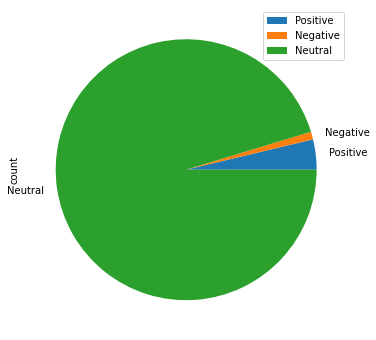

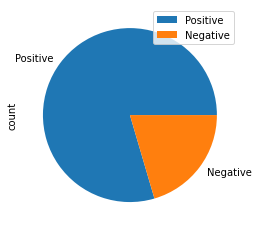

In [27]:
makePie(predictedunhelpfulSnippetsTokenized)

# Average Lengths of Classified Snippets/Product Reviews

In [28]:
def average(lst):
    return sum(lst) / len(lst)

In [49]:
print("Average length of correctly classified helpful reviews:", average([len(word_tokenize(snippet)) for snippet in helpfulSnippets]))
print("Average length of correctly classified unhelpful reviews:", average([len(word_tokenize(snippet)) for snippet in unhelpfulSnippets]))
print("Average length of incorrectly classified helpful reviews:", average([len(word_tokenize(snippet)) for snippet in df_results_predicted_helpfulSnippets]))
print("Average length of incorrectly classified unhelpful reviews:", average([len(word_tokenize(snippet)) for snippet in df_results_predicted_unhelpfulSnippets]))



Average length of correctly classified helpful reviews: 189.1230171073095
Average length of correctly classified unhelpful reviews: 83.79208754208754
Average length of incorrectly classified helpful reviews: 145.4790071296541
Average length of incorrectly classified unhelpful reviews: 99.87713125845737
